GETTING NECESSARY MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


GETTING DATASET READY

In [2]:
dataframe=pd.read_csv("global_cancer_patients_2015_2024.csv")
print(dataframe.shape)
print(dataframe.sample(1))
print(dataframe.info())
print(dataframe.describe())
print(dataframe)

(50000, 15)
     Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
3560  PT0003560   55  Female         Russia  2021           7.7   

      Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
3560            6.6          4.2      9.6            4.0    Leukemia   

     Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
3560     Stage IV            21123.49             6.8                   7.06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution       

In [3]:
print(dataframe.isna().sum())

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


In [4]:
print(dataframe.duplicated().sum())

0


In [5]:
dataframe.select_dtypes(include=["object"])

Patient_ID  Gender Country_Region Cancer_Type Cancer_Stage
0      PT0000000    Male             UK        Lung    Stage III
1      PT0000001    Male          China    Leukemia      Stage 0
2      PT0000002    Male       Pakistan      Breast     Stage II
3      PT0000003    Male             UK       Colon      Stage I
4      PT0000004  Female         Brazil        Skin    Stage III
...          ...     ...            ...         ...          ...
49995  PT0049995    Male       Pakistan    Leukemia      Stage 0
49996  PT0049996  Female            USA       Colon      Stage I
49997  PT0049997    Male       Pakistan      Breast      Stage 0
49998  PT0049998    Male         Brazil       Liver     Stage IV
49999  PT0049999    Male       Pakistan       Liver      Stage 0

[50000 rows x 5 columns]

In [6]:
dataframe.drop(columns=["Patient_ID"],axis=1,inplace=True)

In [7]:
listed=dataframe.select_dtypes(include=["object"]).columns

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()
encoder2=LabelEncoder()
encoder3=LabelEncoder()
encoder4=LabelEncoder()
dataframe['Gender']=encoder1.fit_transform(dataframe["Gender"])
dataframe['Country_Region']=encoder2.fit_transform(dataframe["Country_Region"])
dataframe['Cancer_Type']=encoder3.fit_transform(dataframe["Cancer_Type"])
dataframe['Cancer_Stage']=encoder4.fit_transform(dataframe["Cancer_Stage"])

In [9]:
print(encoder1.classes_)
print(encoder2.classes_)
print(encoder3.classes_)
print(encoder4.classes_)
print(encoder1.classes_)

print(dataframe["Country_Region"].unique())
print(dataframe["Gender"].unique())
print(dataframe["Cancer_Type"].unique())
print(dataframe["Cancer_Stage"].unique())

['Female' 'Male' 'Other']
['Australia' 'Brazil' 'Canada' 'China' 'Germany' 'India' 'Pakistan'
 'Russia' 'UK' 'USA']
['Breast' 'Cervical' 'Colon' 'Leukemia' 'Liver' 'Lung' 'Prostate' 'Skin']
['Stage 0' 'Stage I' 'Stage II' 'Stage III' 'Stage IV']
['Female' 'Male' 'Other']
[8 3 6 1 4 2 9 5 0 7]
[1 0 2]
[5 3 0 2 7 1 6 4]
[3 0 2 1 4]


In [10]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  int32  
 2   Country_Region         50000 non-null  int32  
 3   Year                   50000 non-null  int64  
 4   Genetic_Risk           50000 non-null  float64
 5   Air_Pollution          50000 non-null  float64
 6   Alcohol_Use            50000 non-null  float64
 7   Smoking                50000 non-null  float64
 8   Obesity_Level          50000 non-null  float64
 9   Cancer_Type            50000 non-null  int32  
 10  Cancer_Stage           50000 non-null  int32  
 11  Treatment_Cost_USD     50000 non-null  float64
 12  Survival_Years         50000 non-null  float64
 13  Target_Severity_Score  50000 non-null  float64
dtypes: float64(8), int32(4), int64(2)
memory usage: 4.6 MB

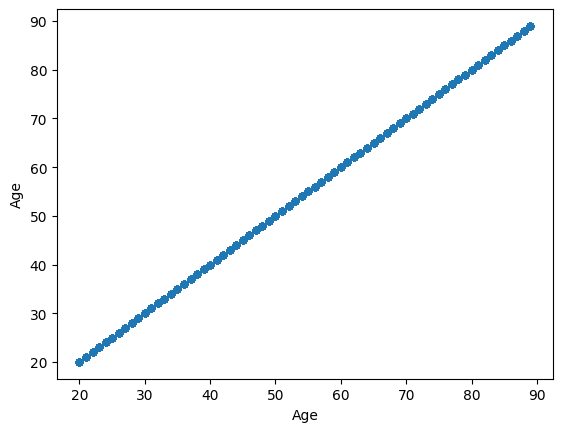

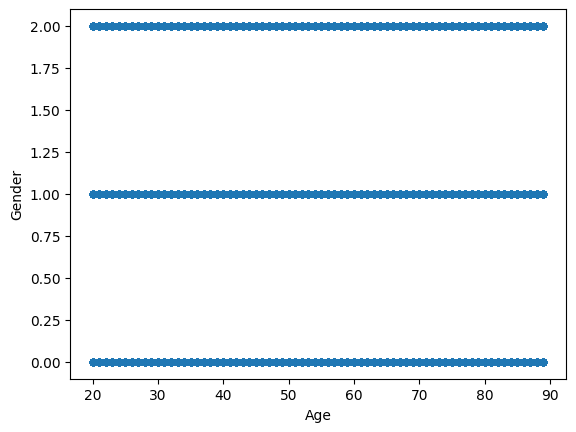

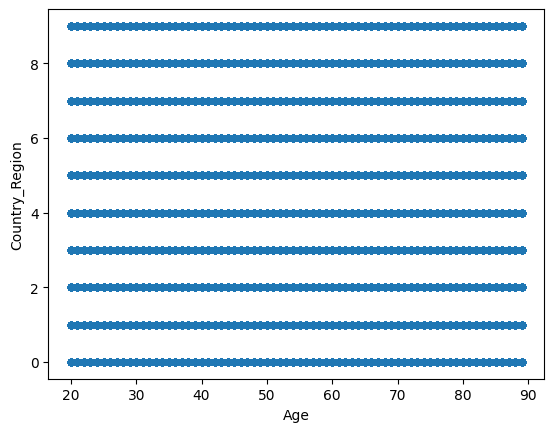

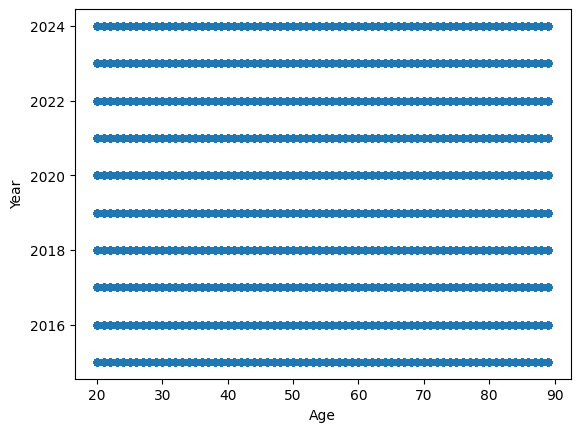

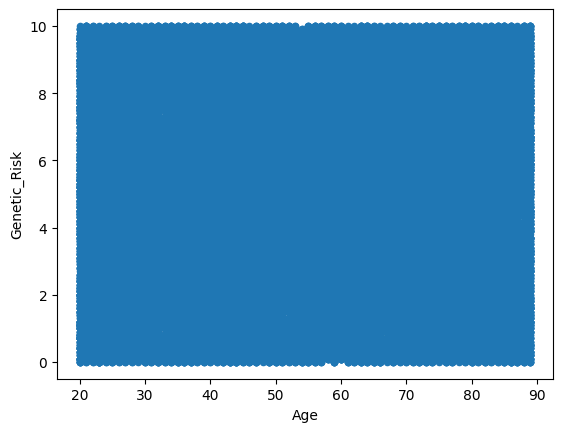

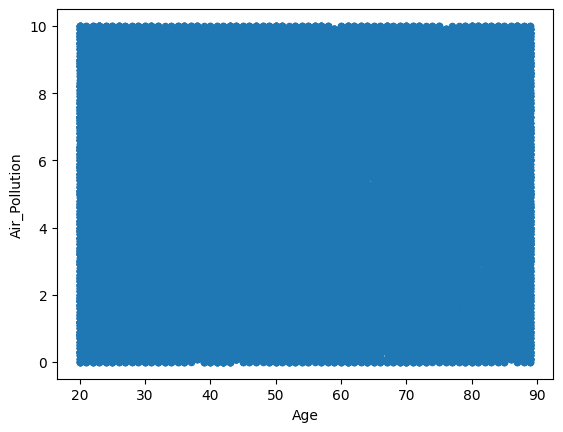

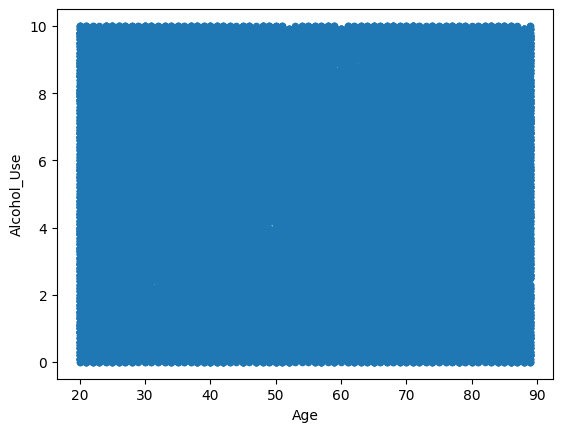

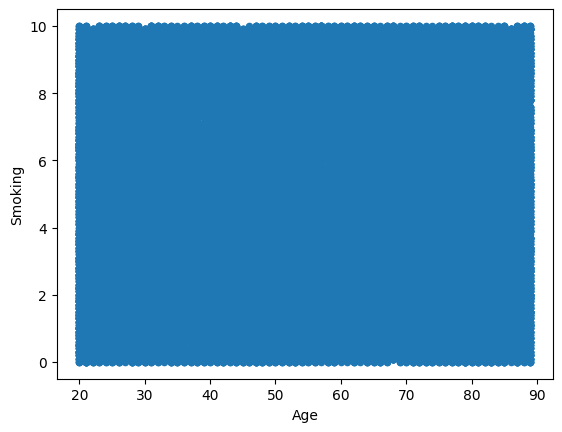

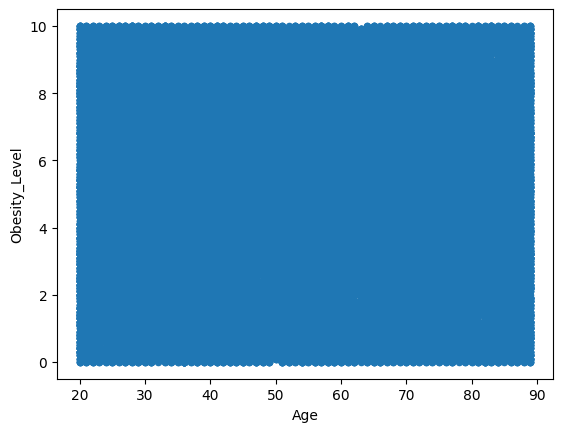

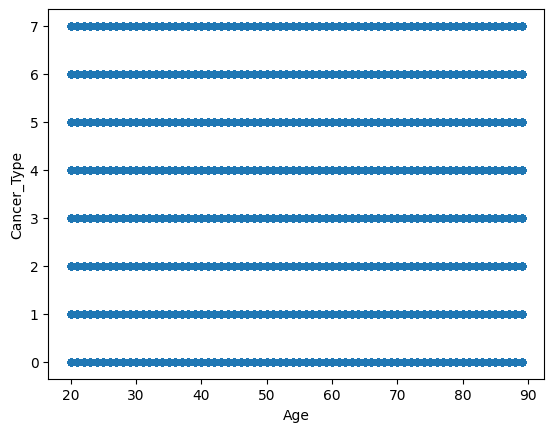

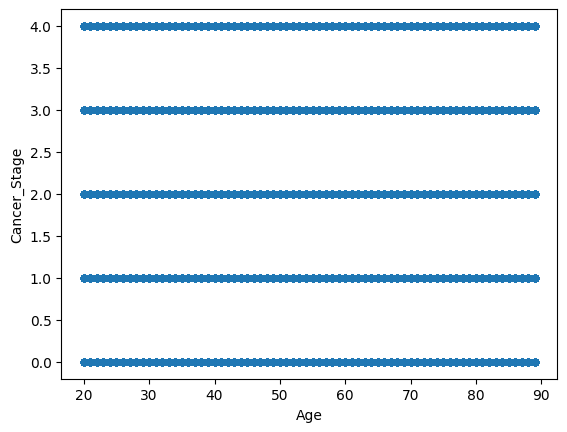

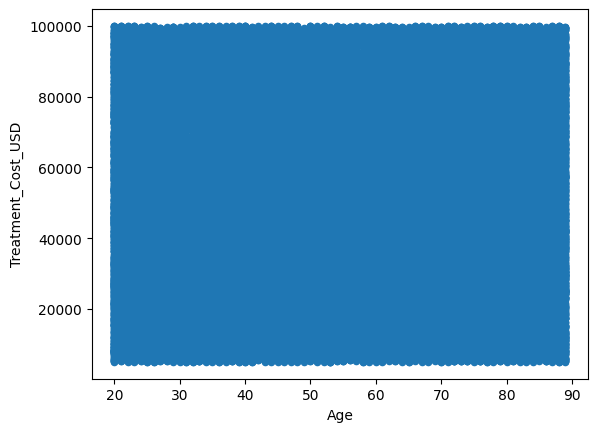

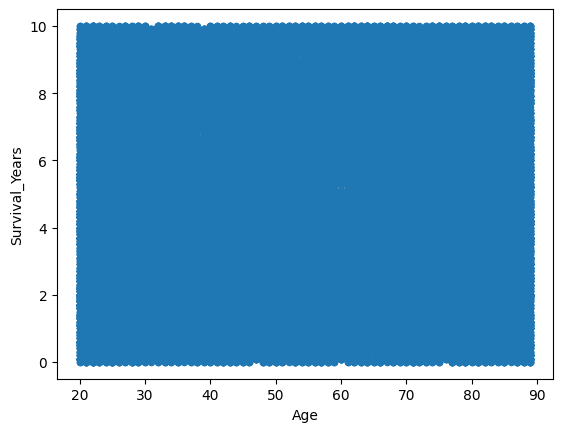

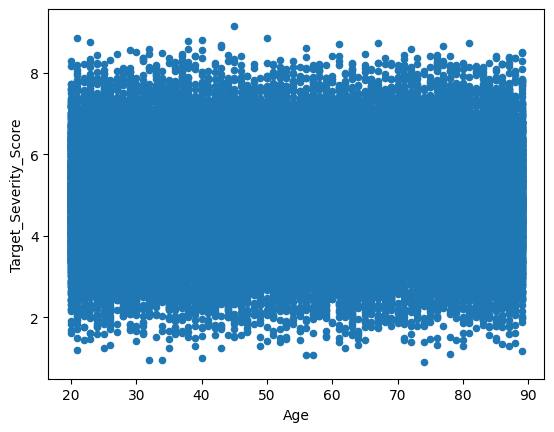

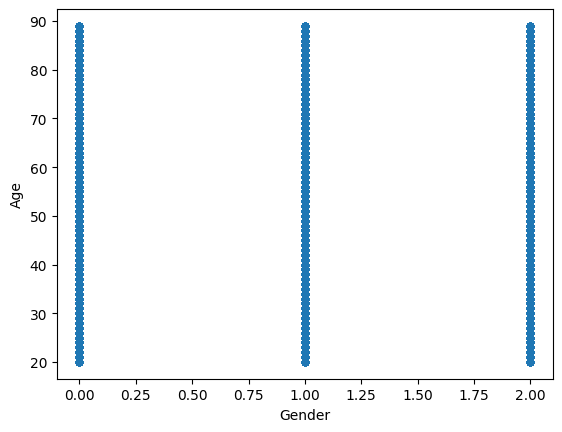

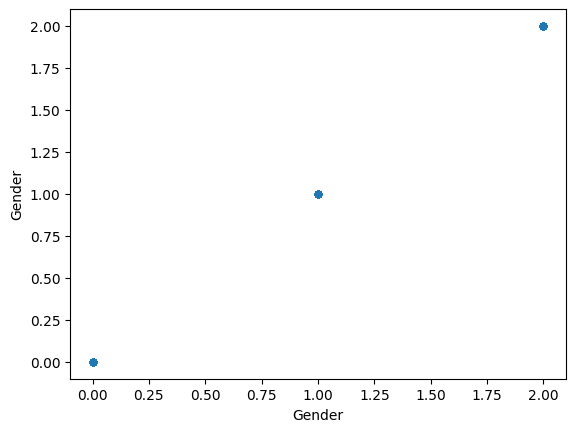

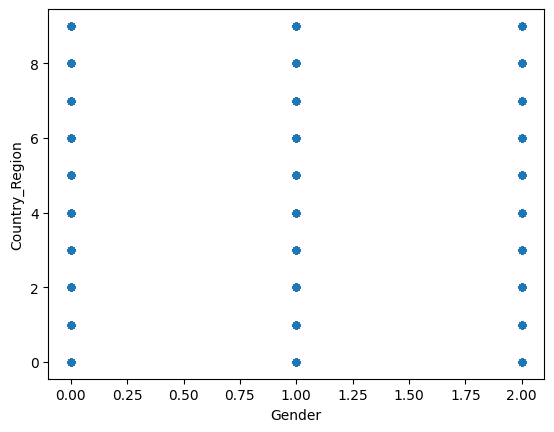

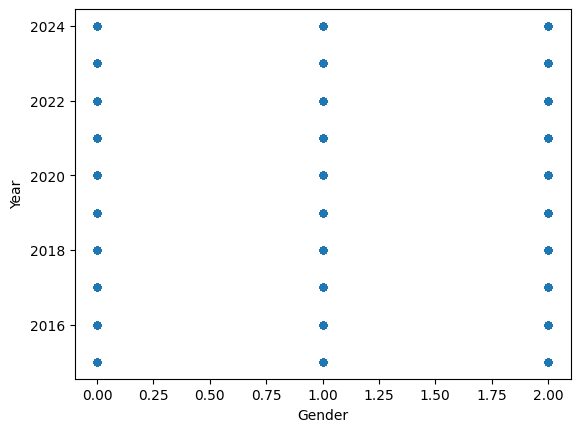

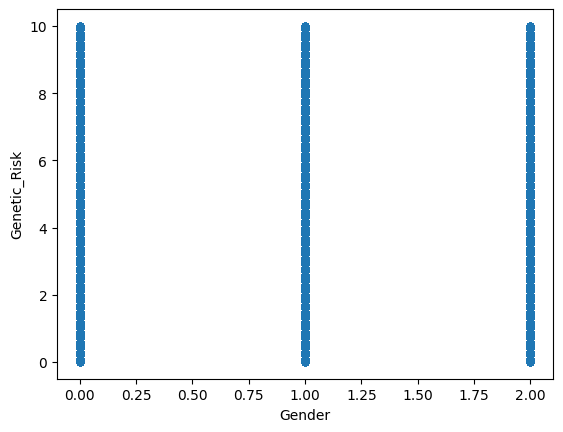

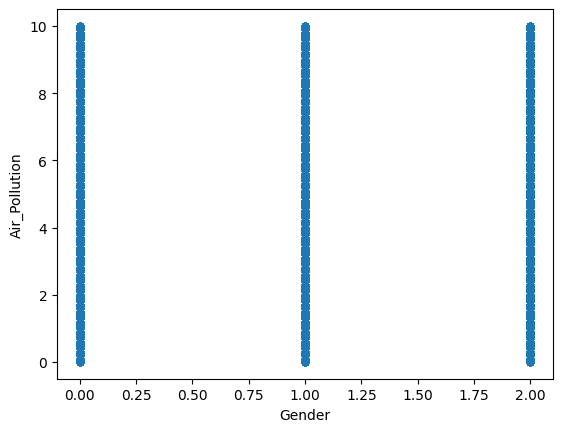

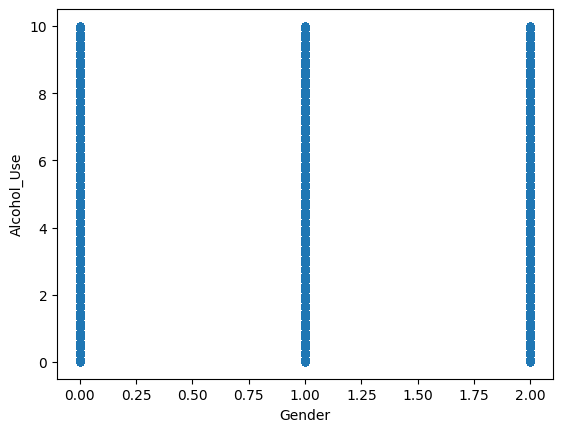

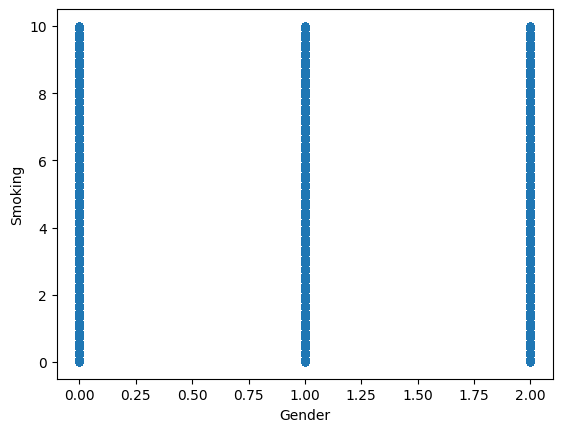

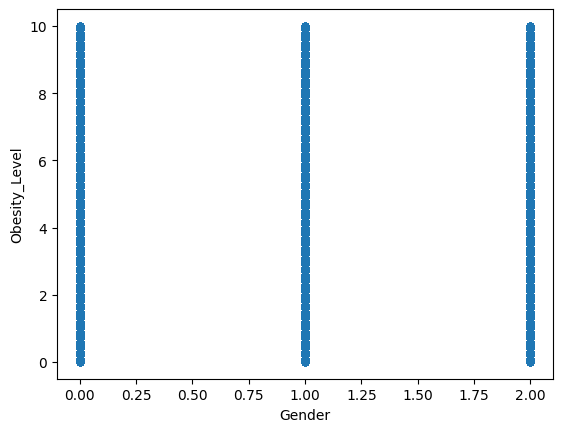

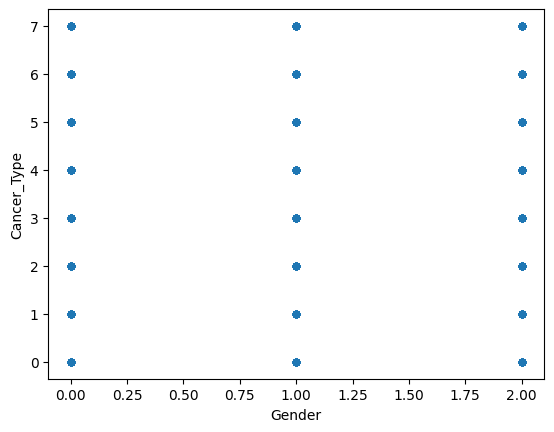

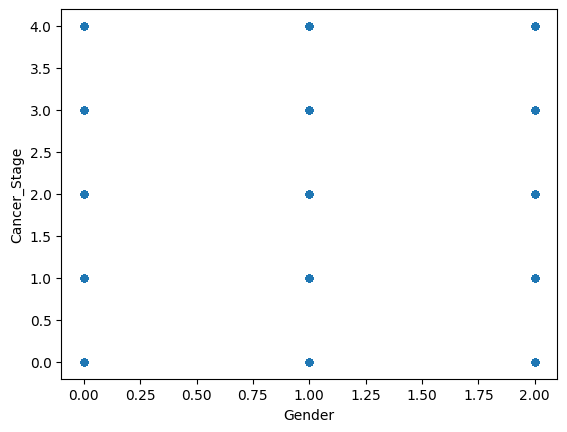

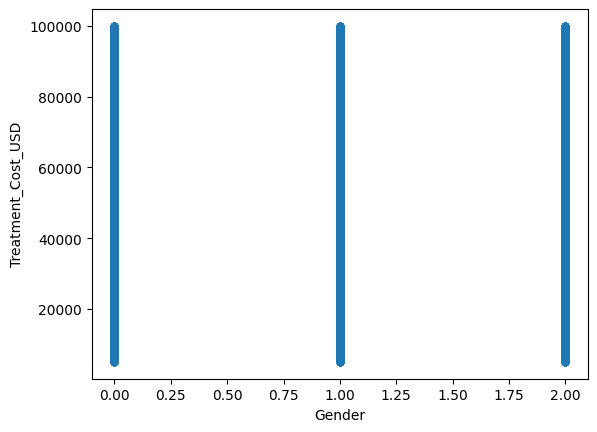

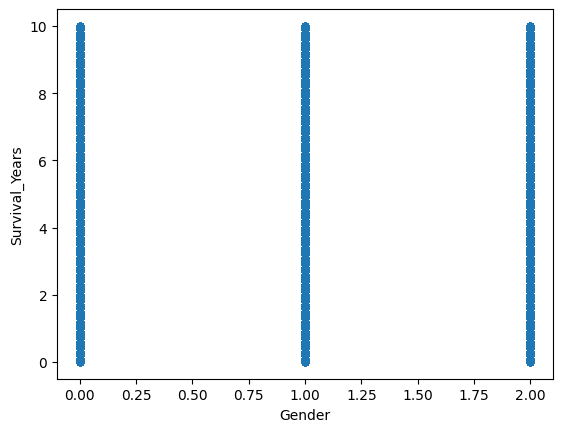

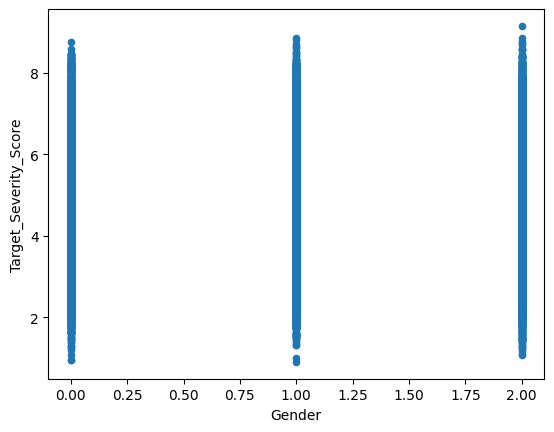

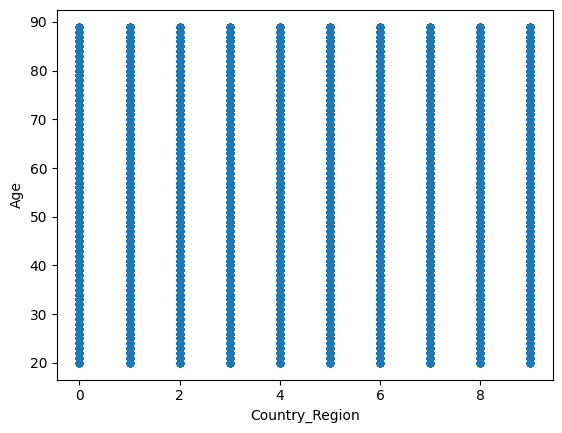

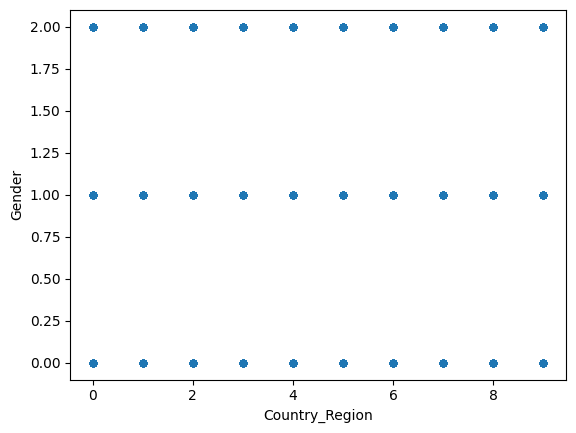

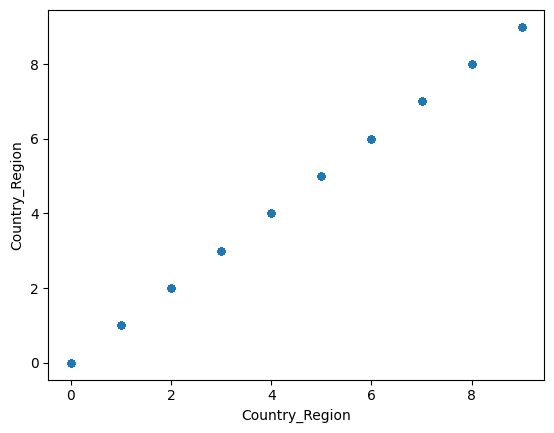

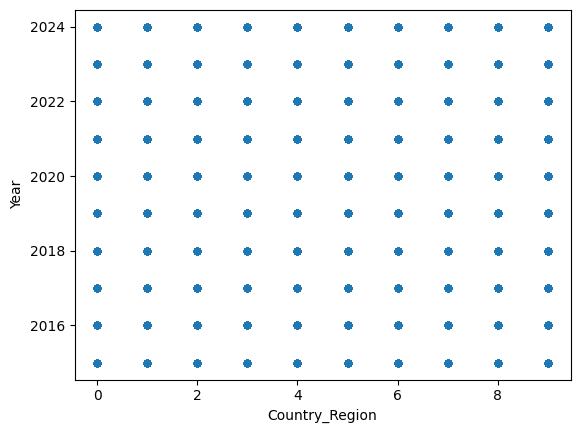

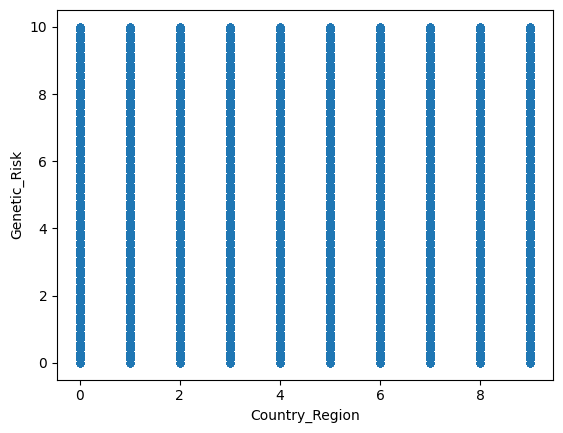

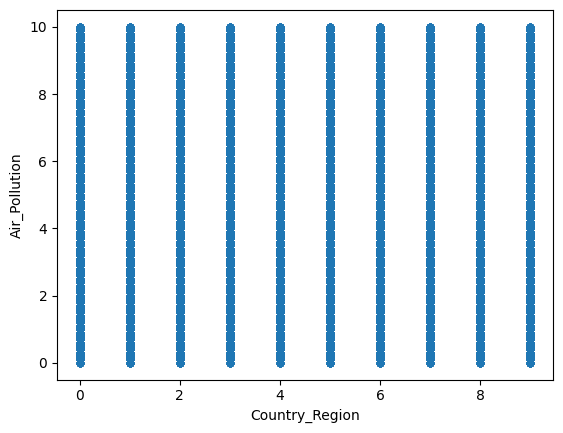

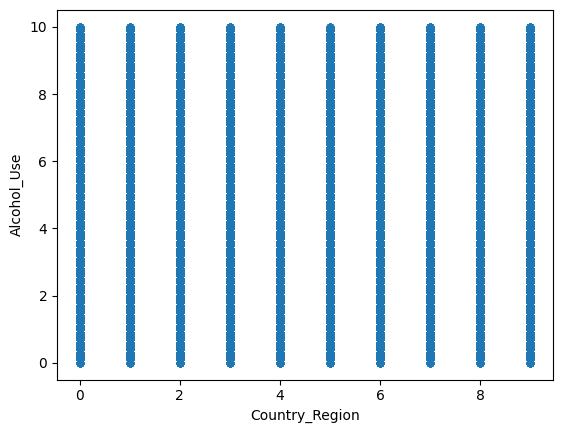

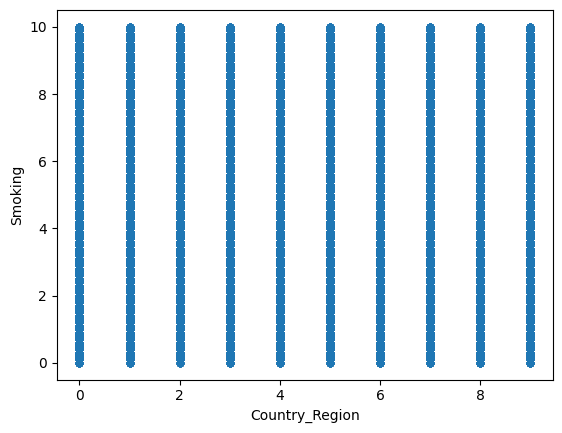

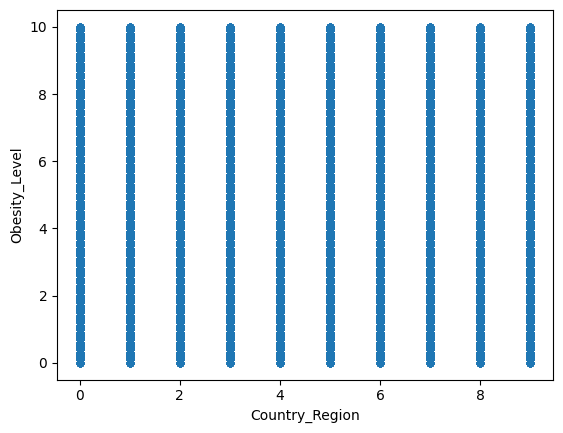

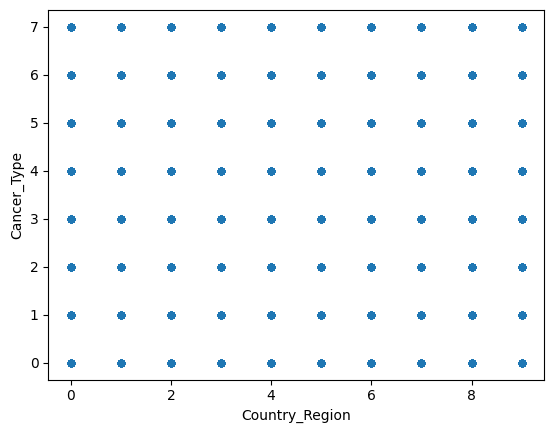

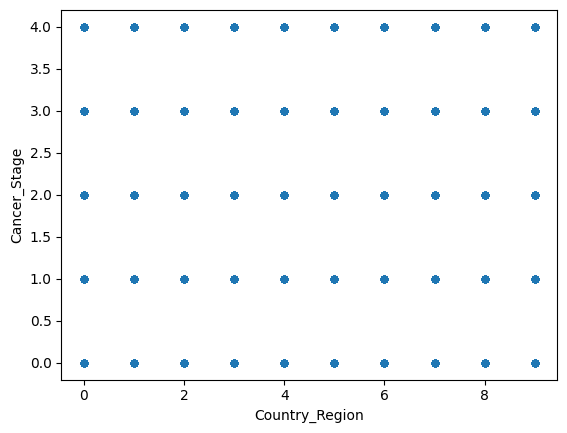

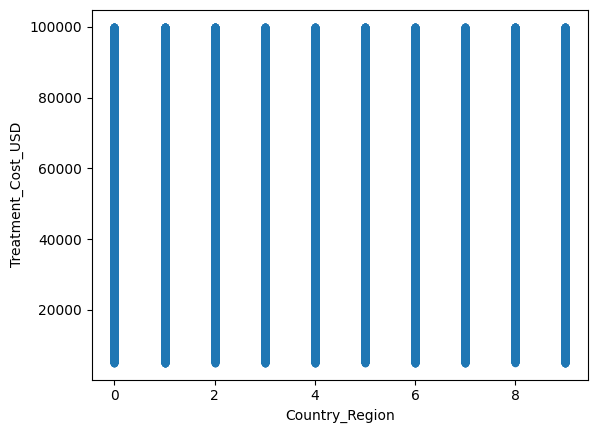

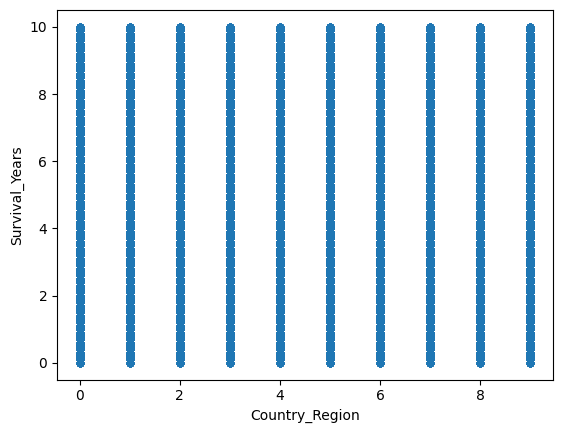

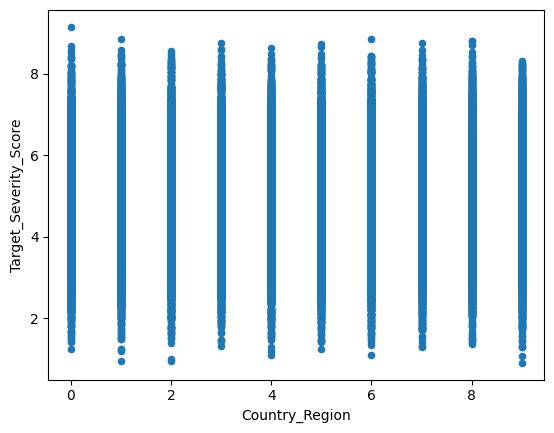

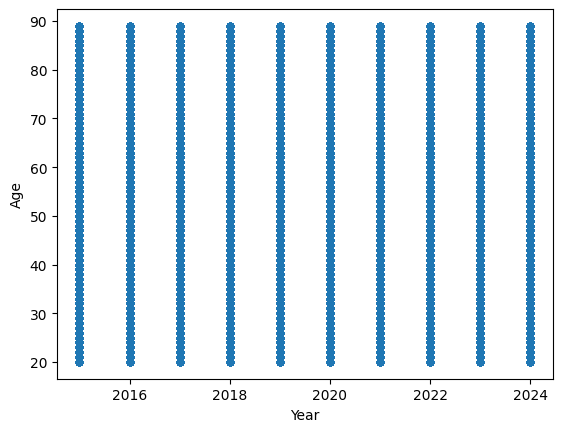

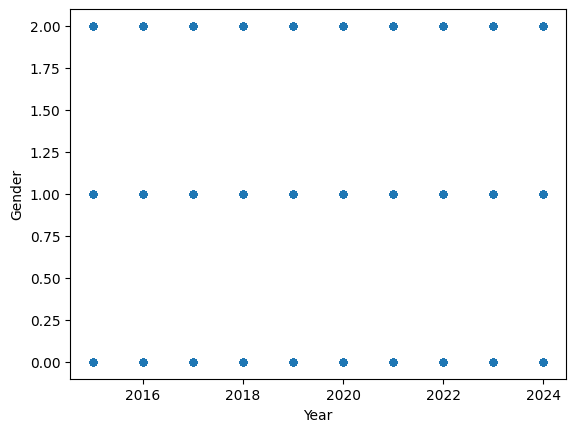

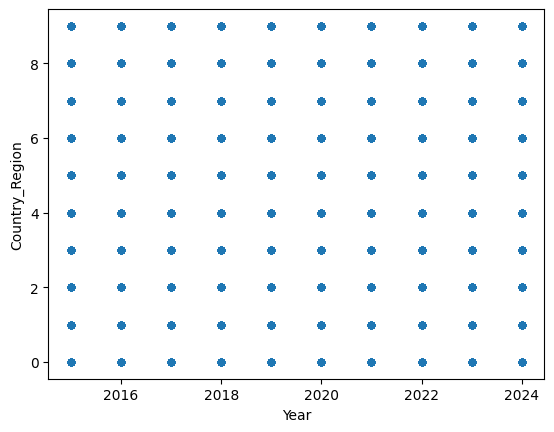

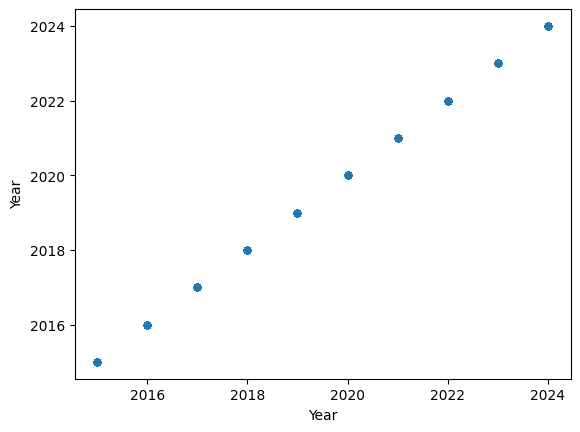

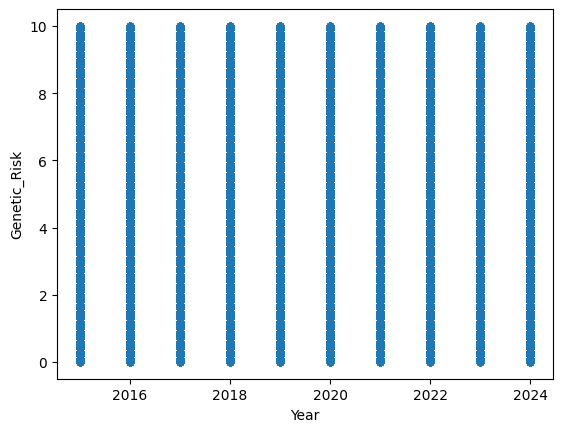

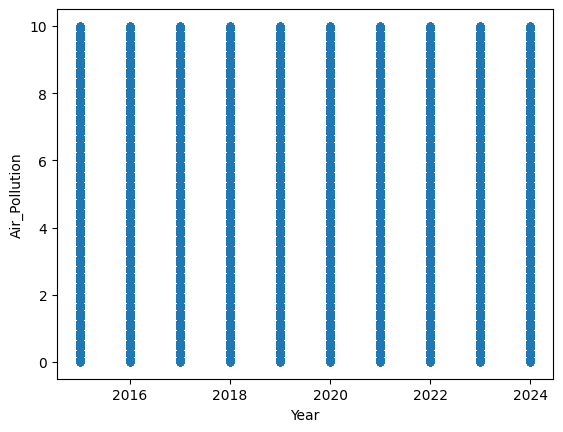

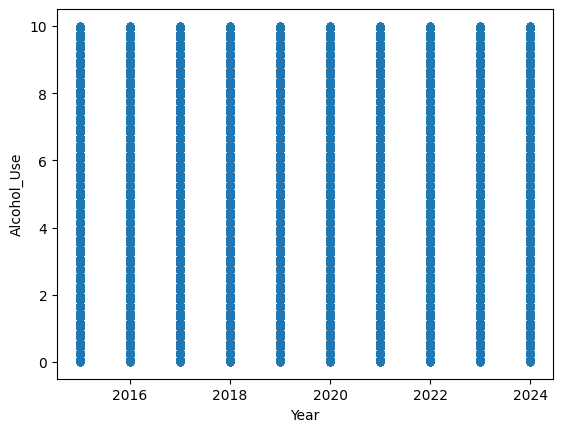

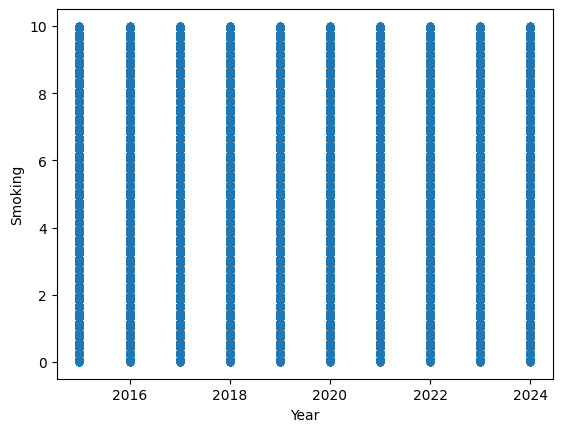

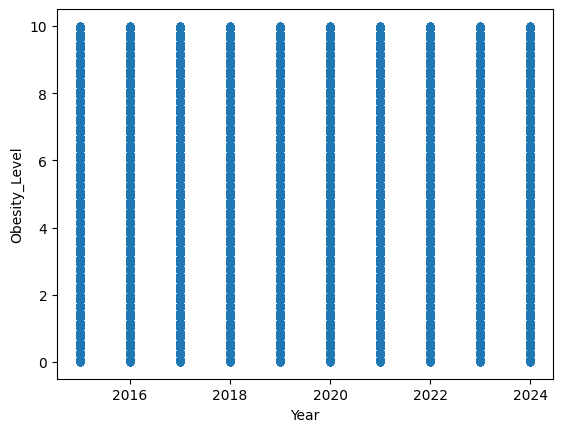

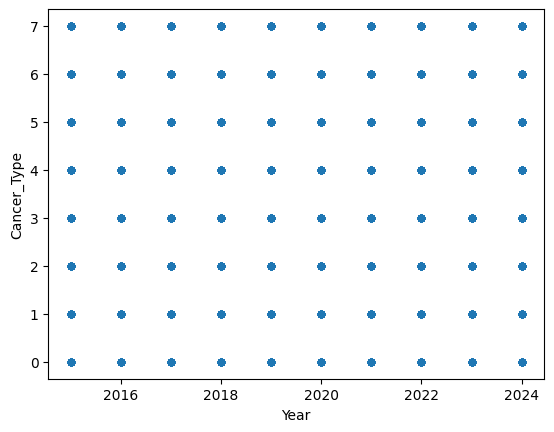

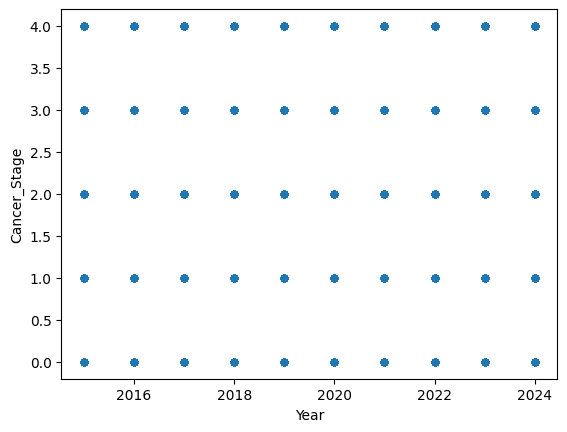

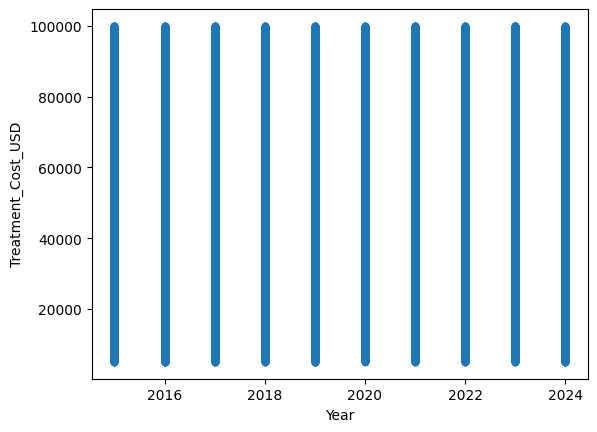

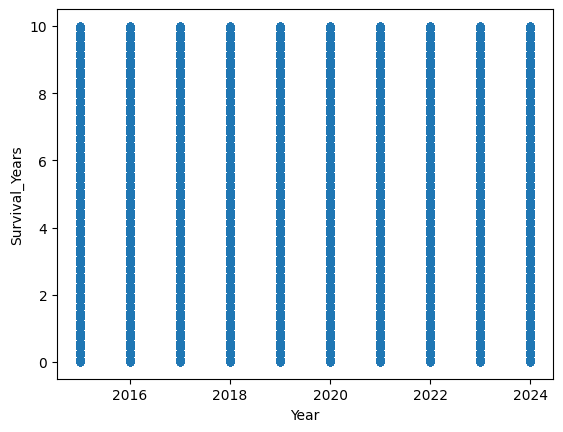

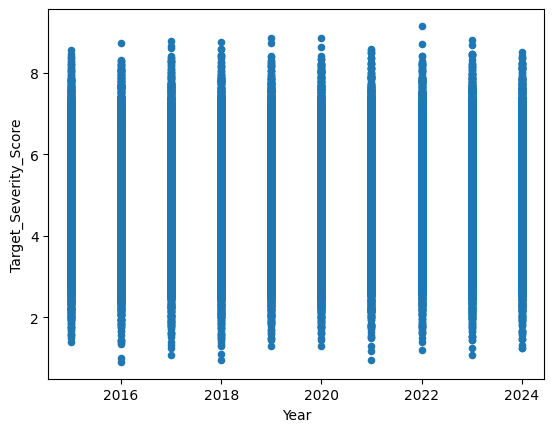

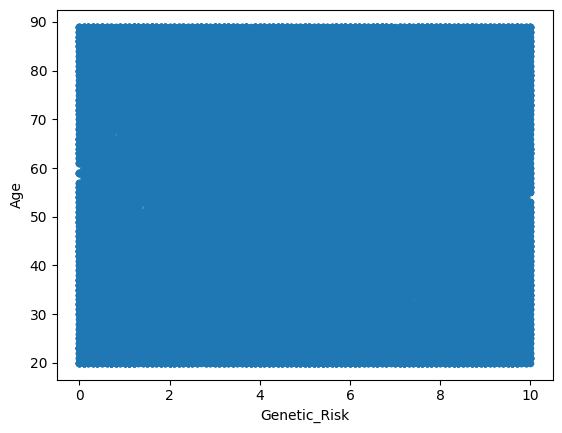

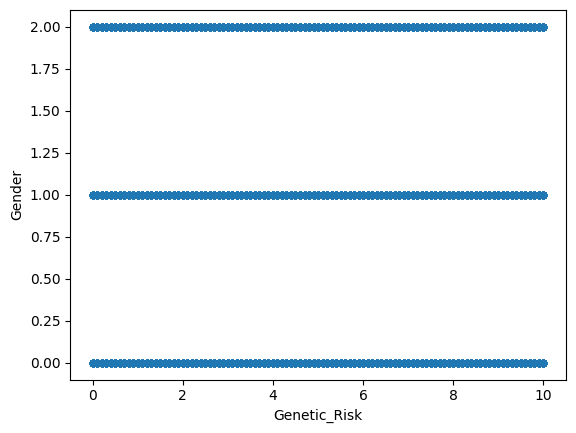

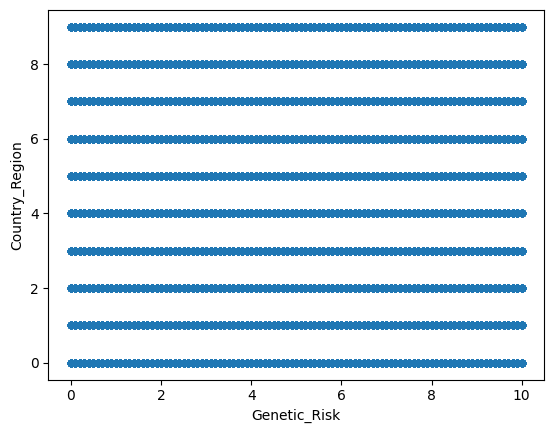

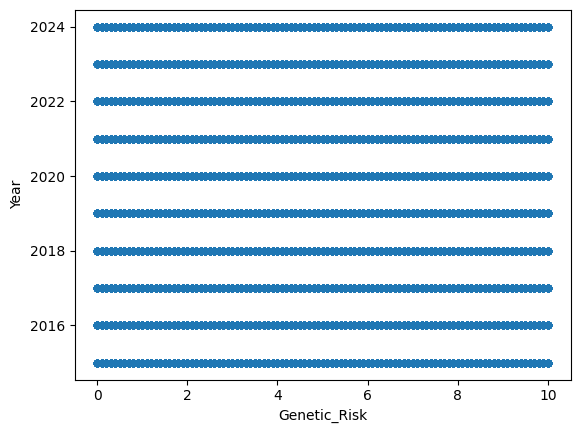

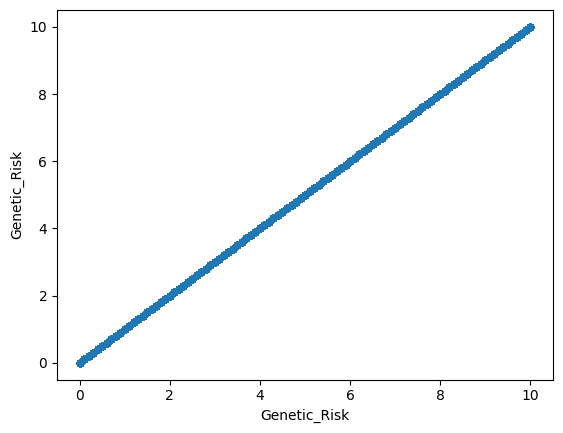

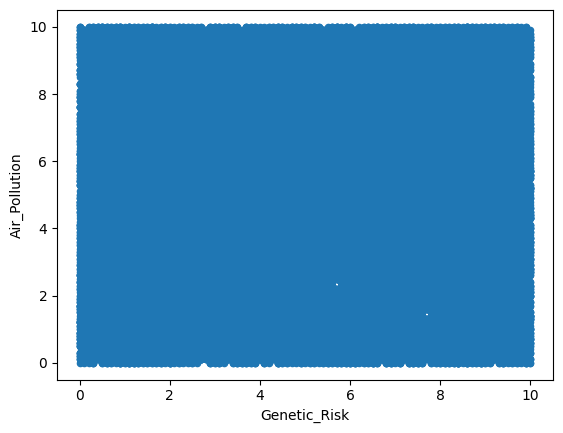

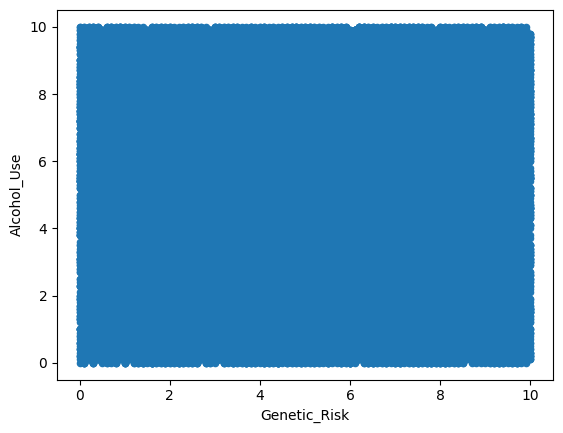

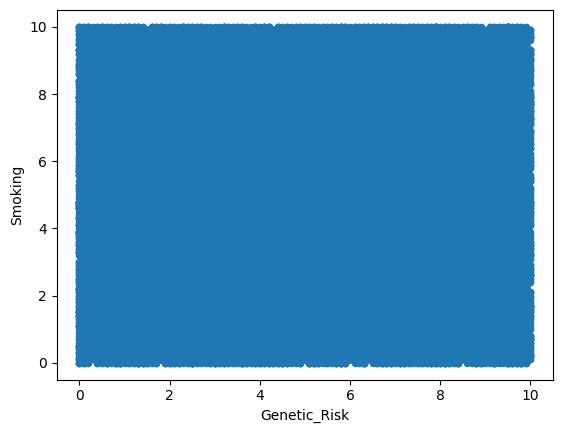

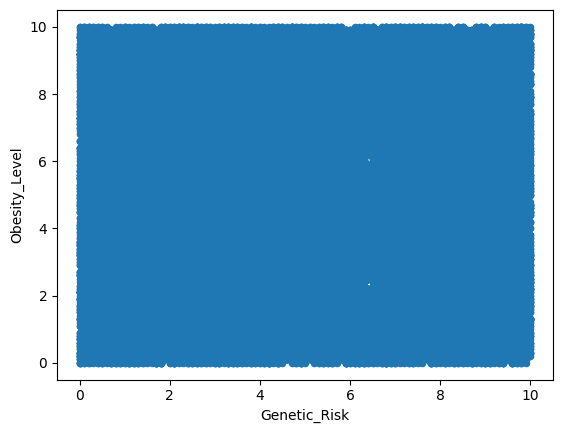

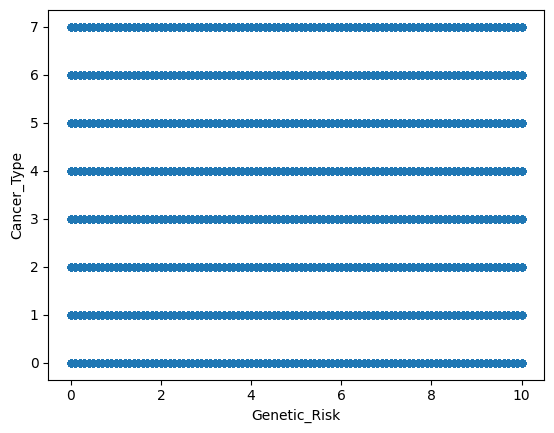

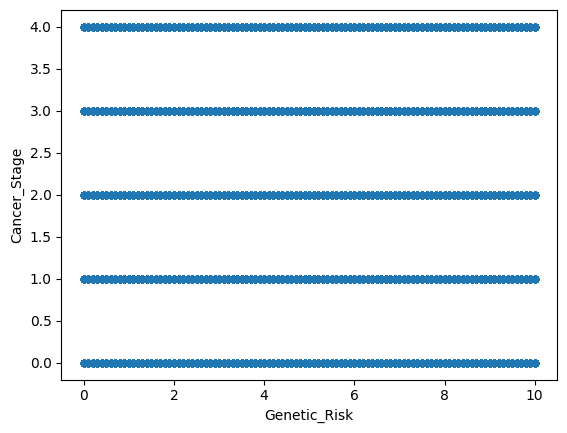

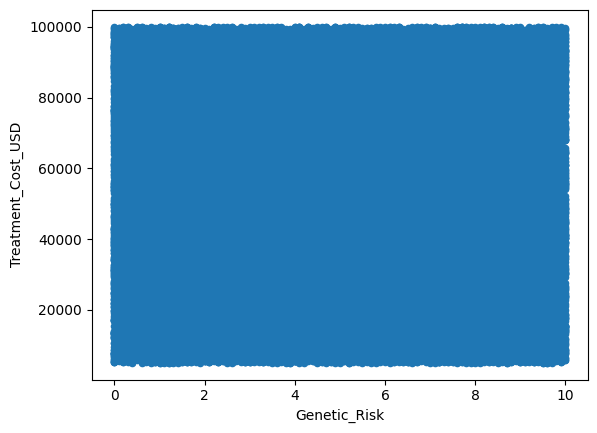

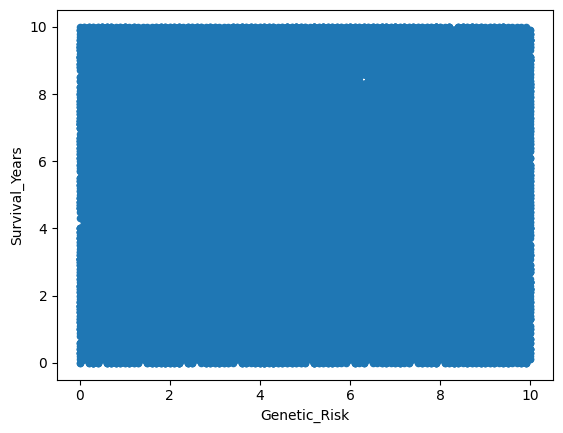

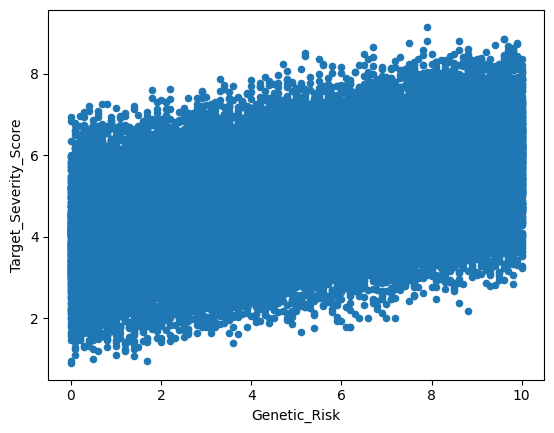

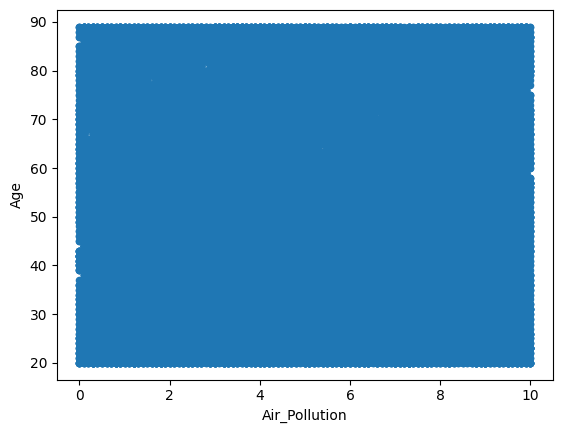

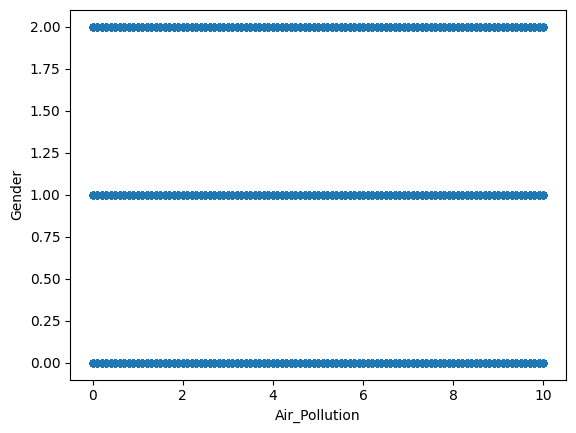

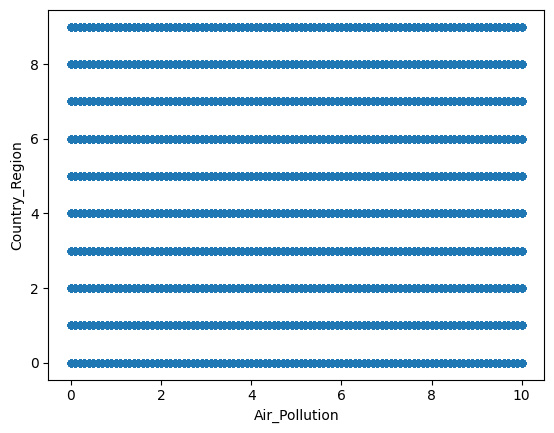

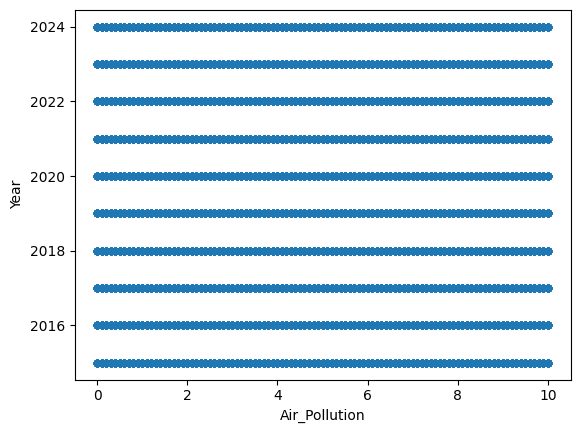

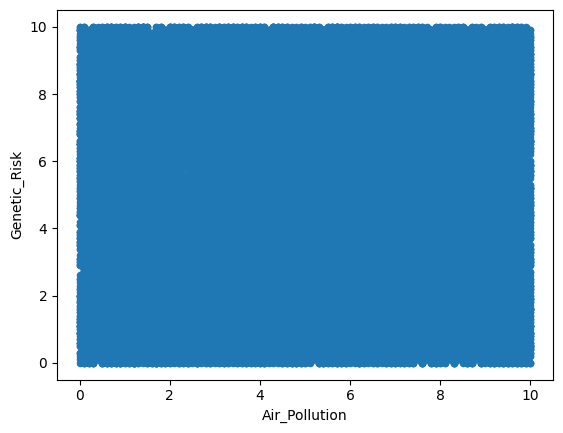

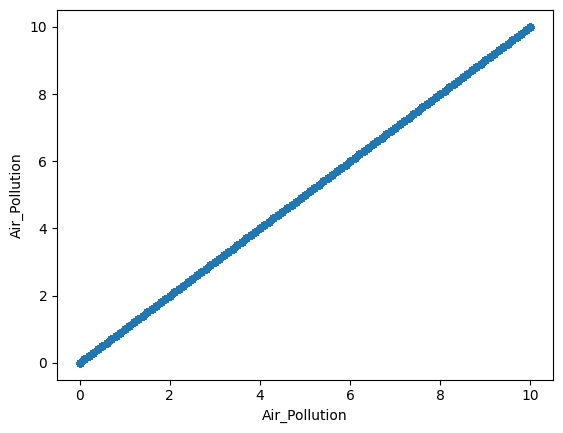

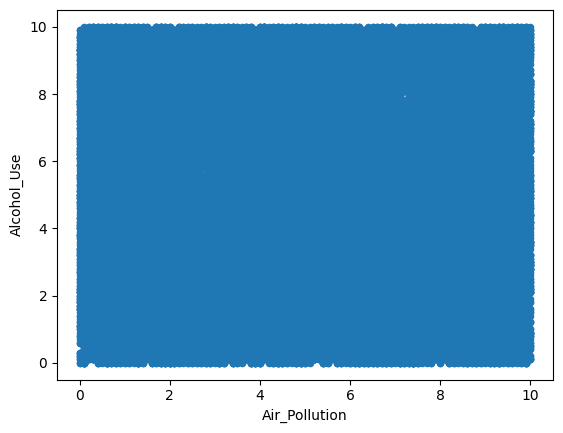

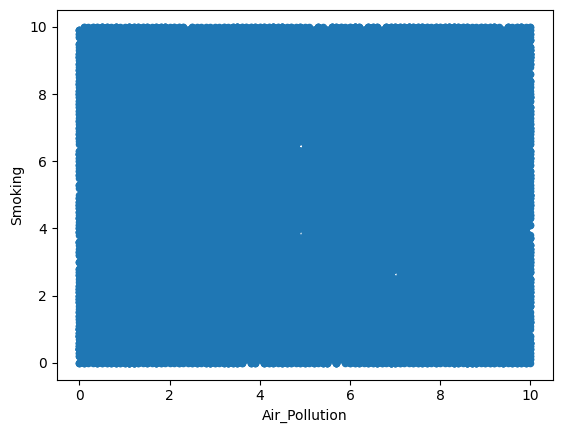

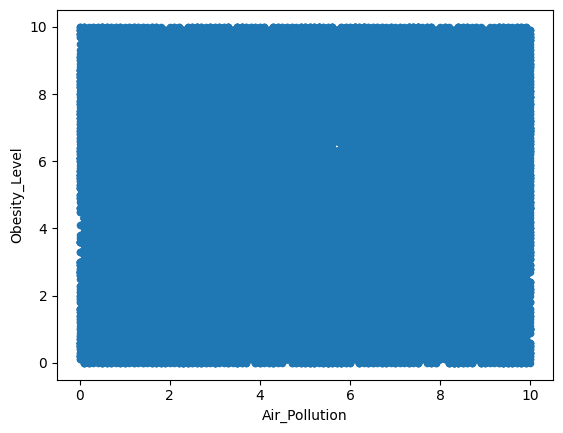

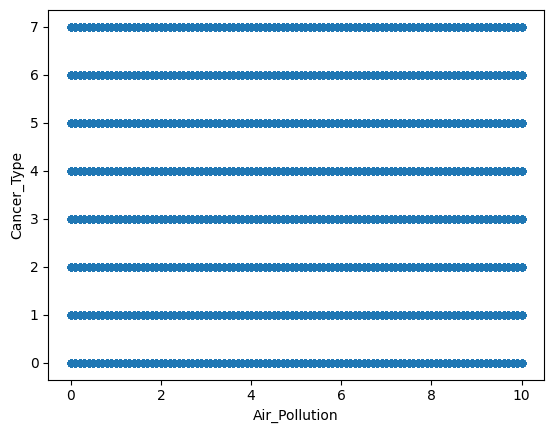

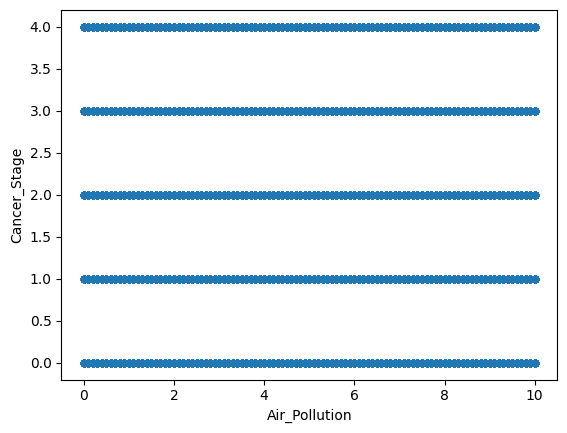

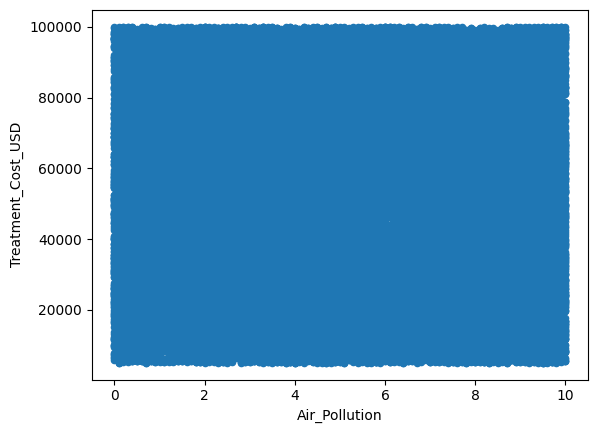

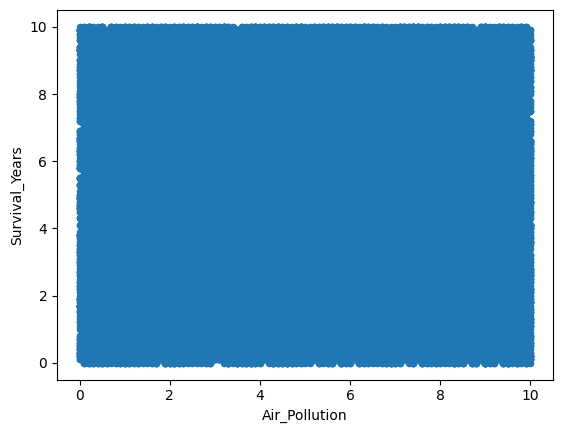

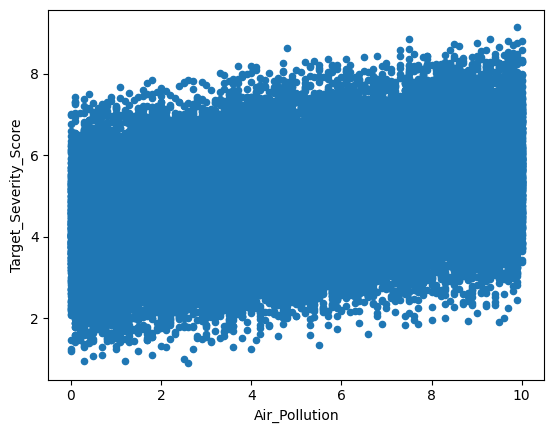

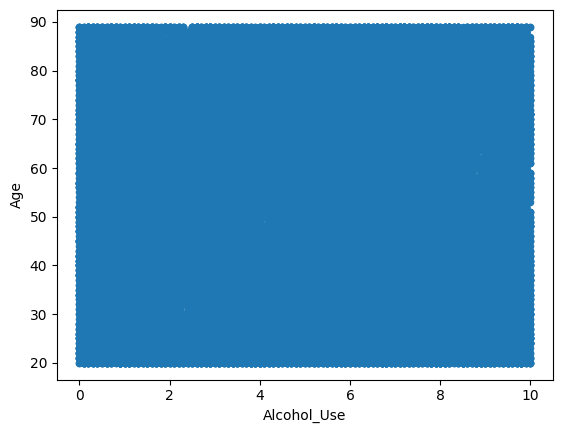

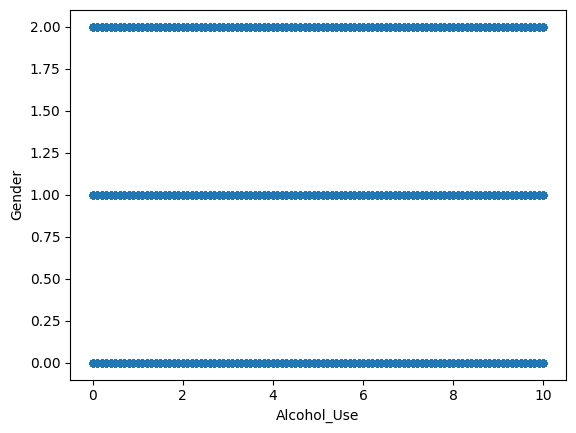

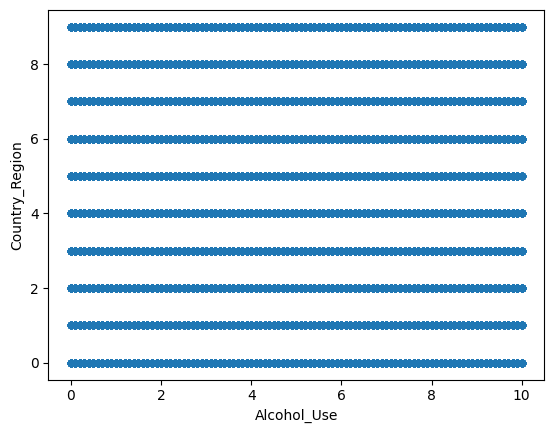

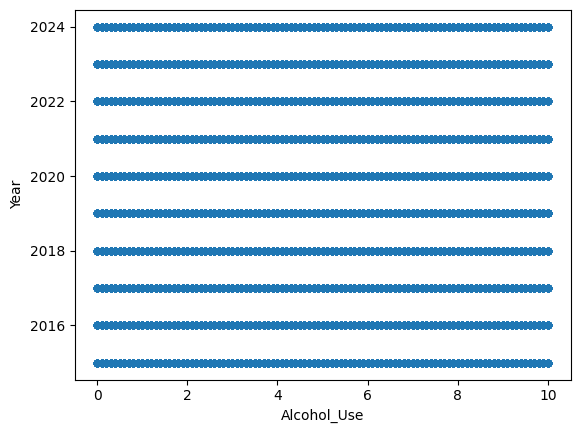

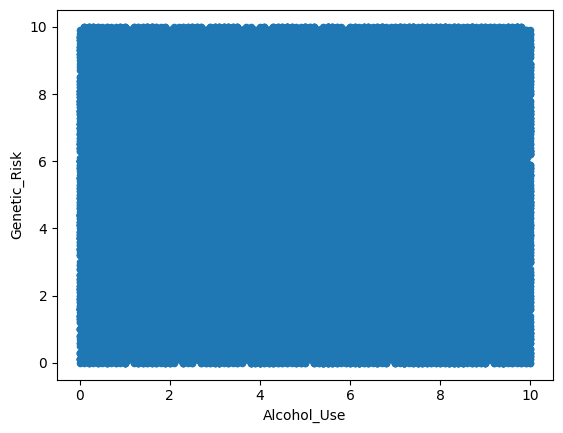

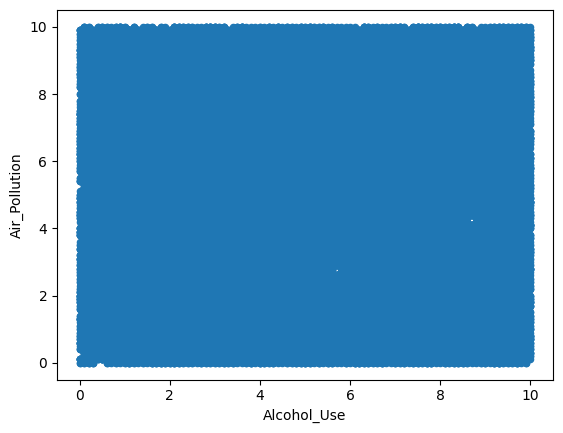

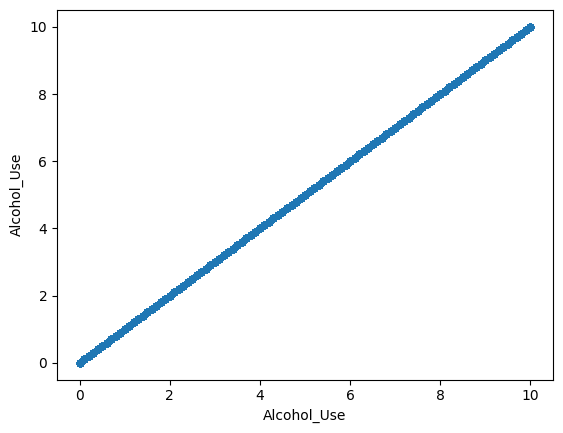

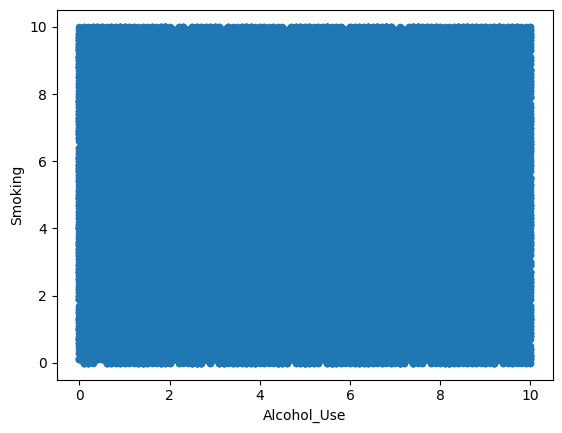

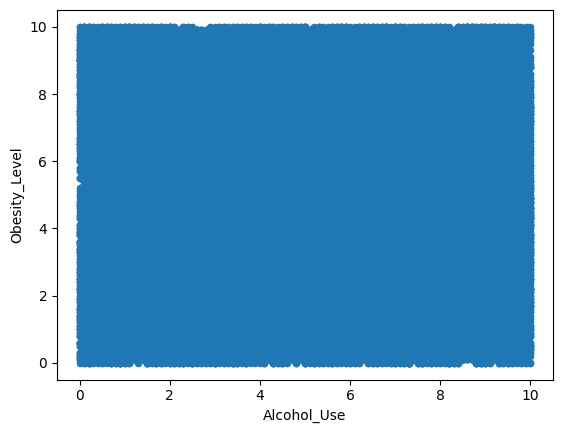

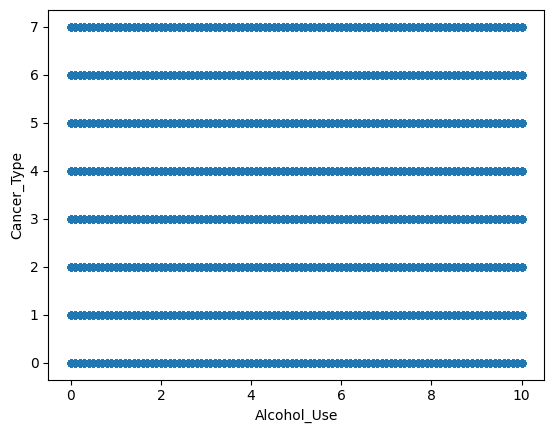

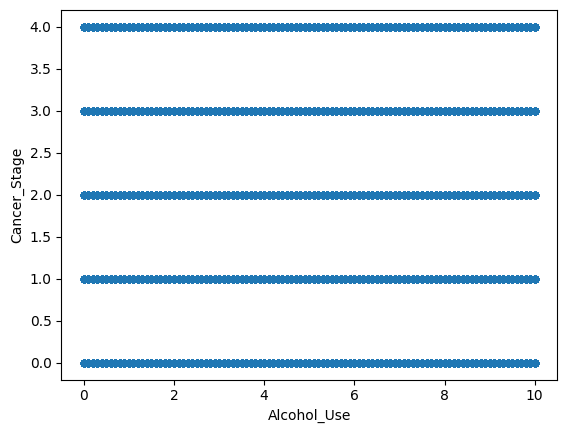

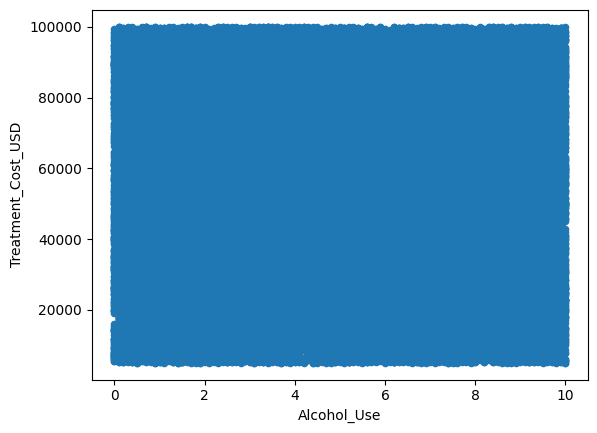

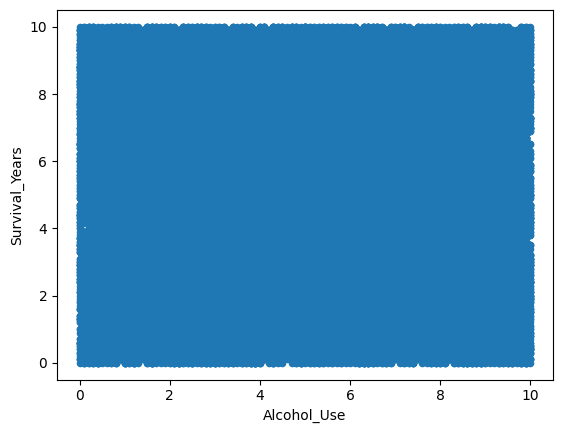

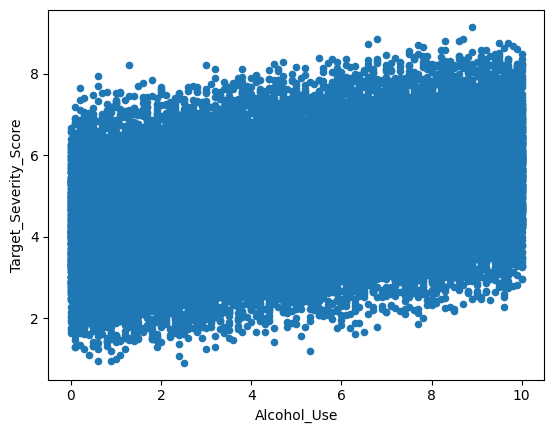

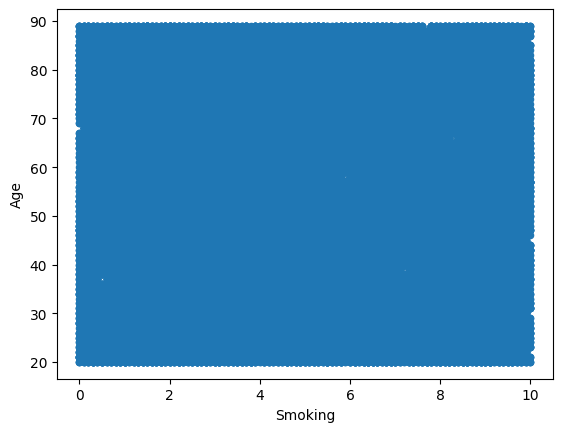

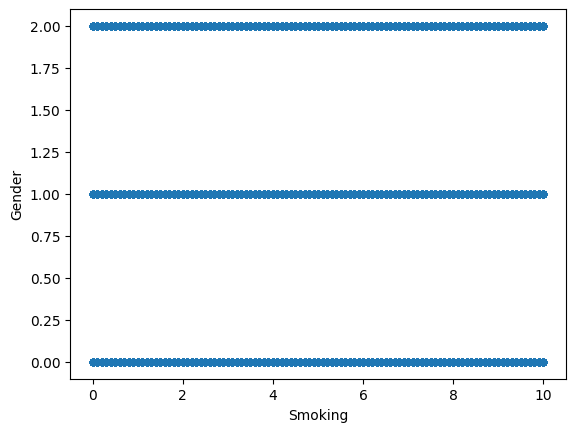

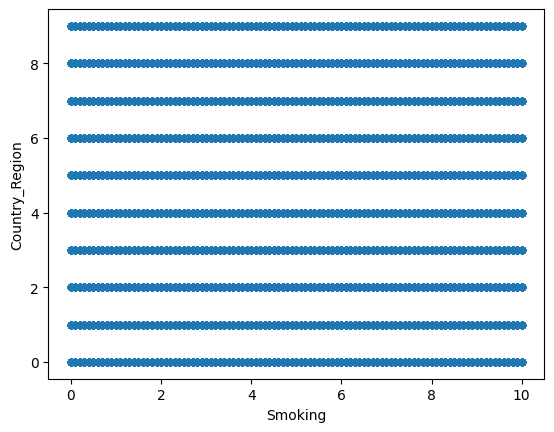

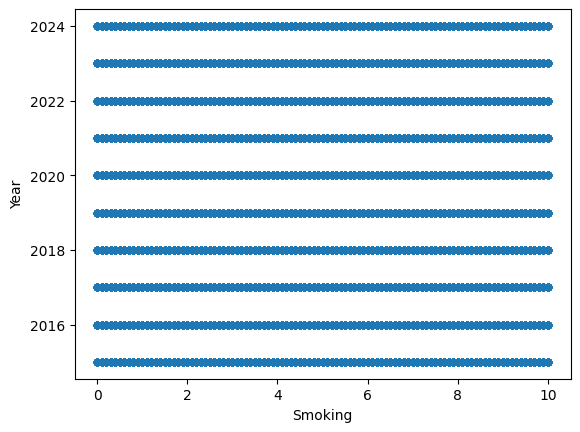

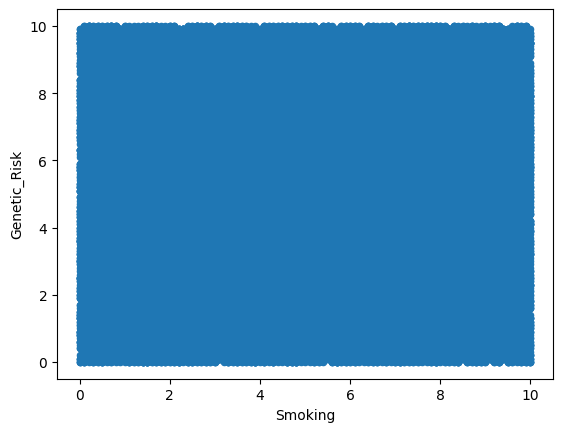

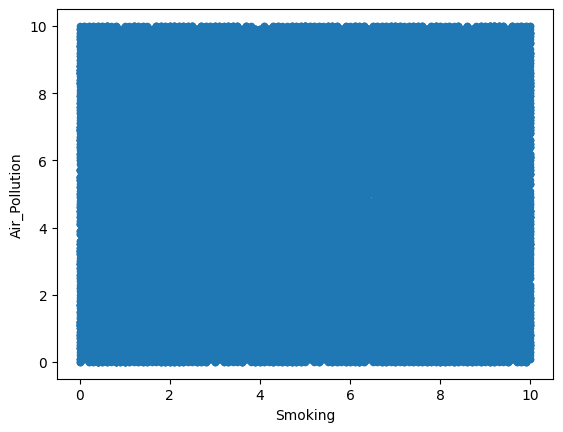

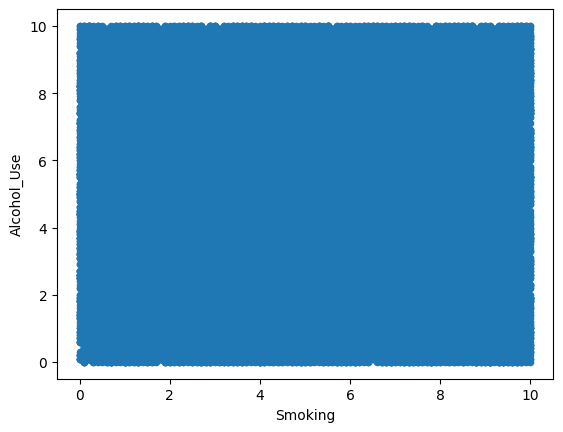

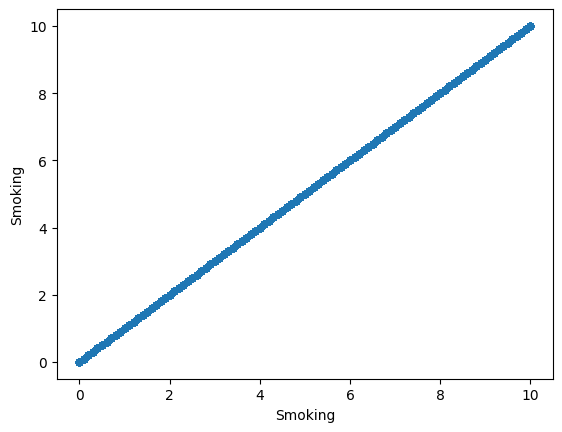

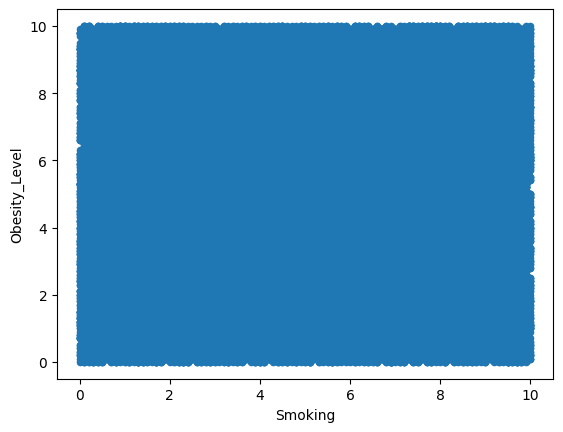

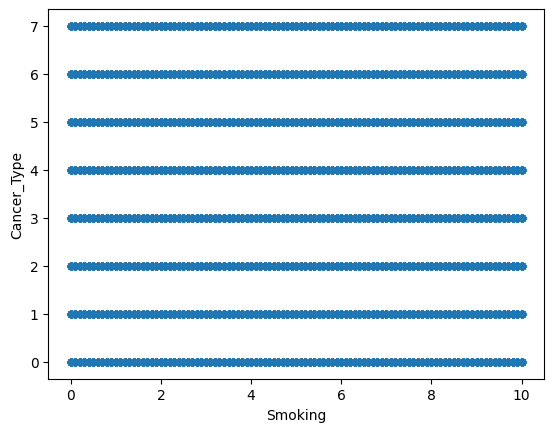

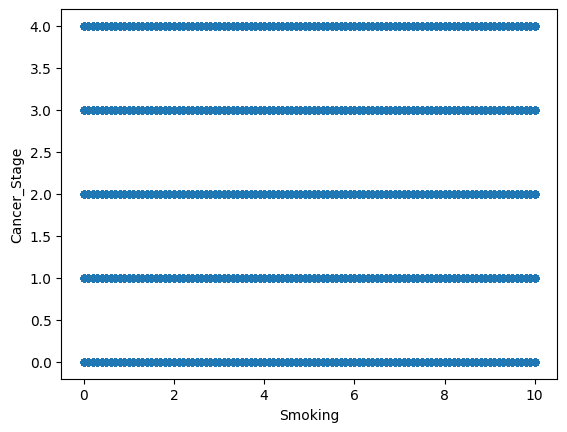

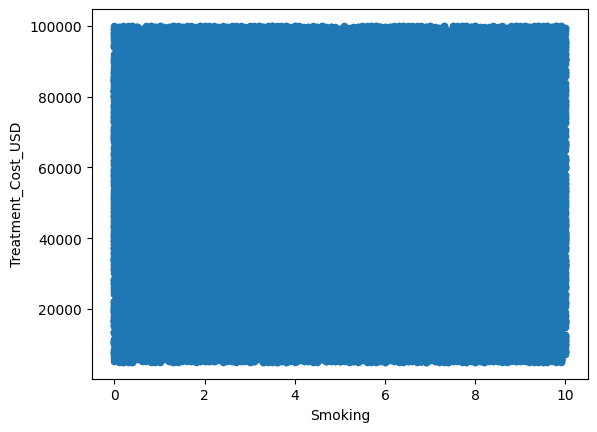

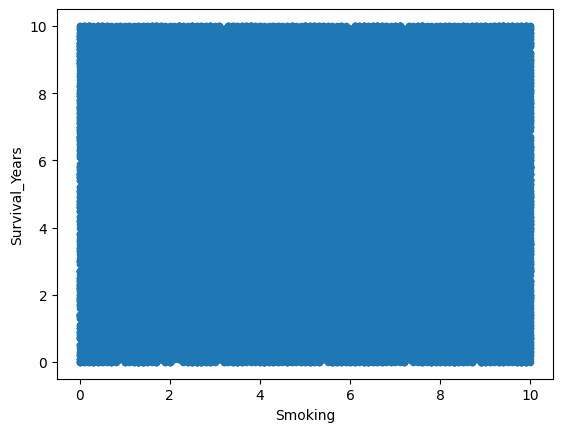

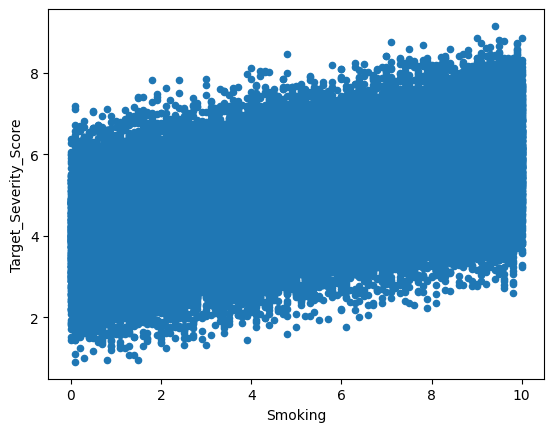

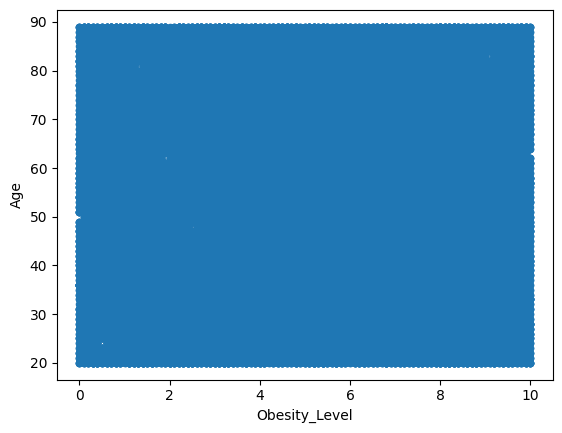

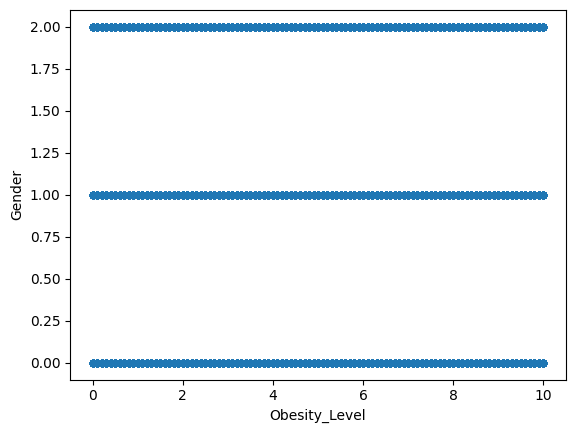

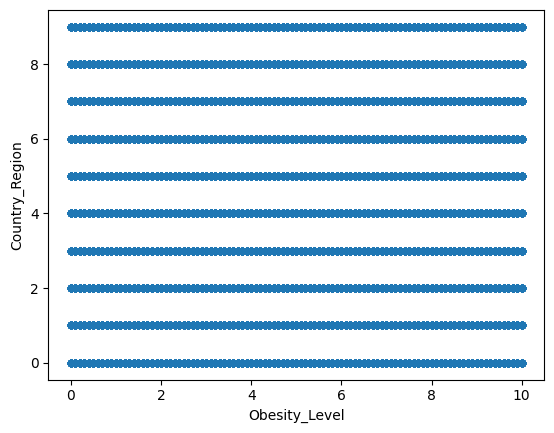

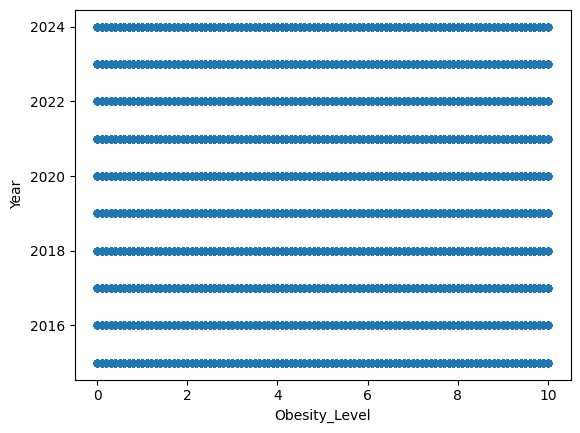

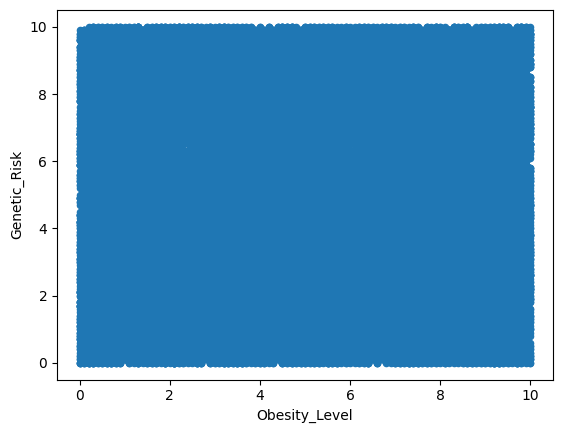

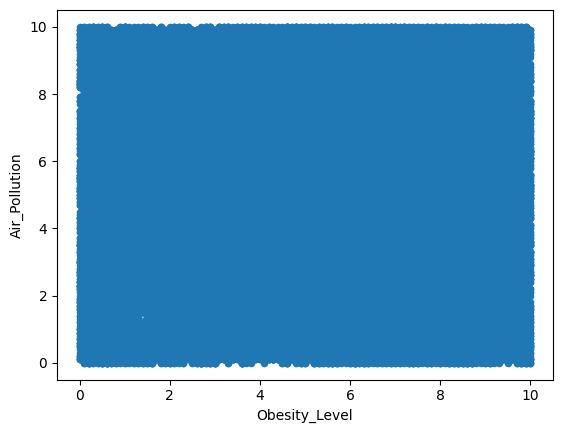

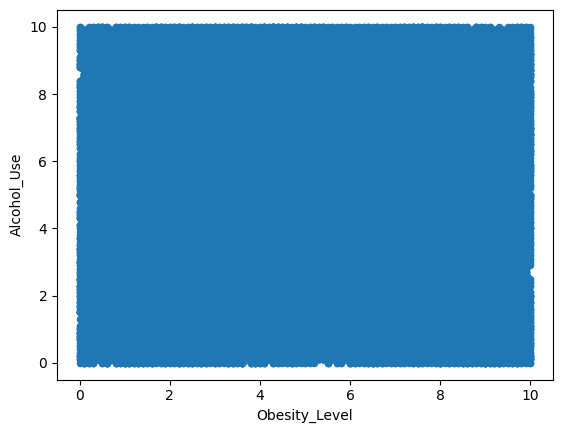

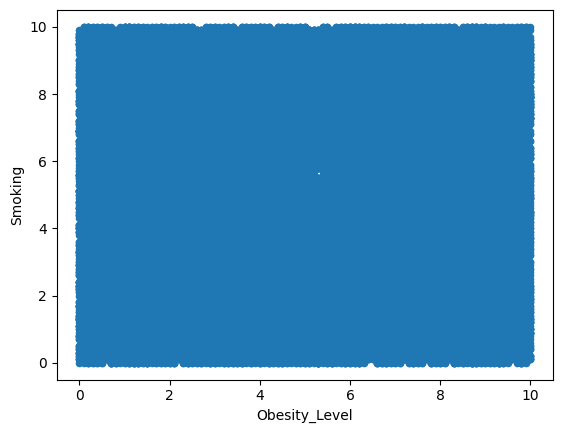

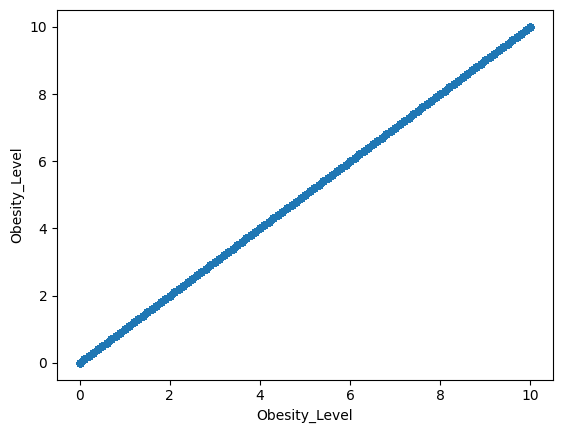

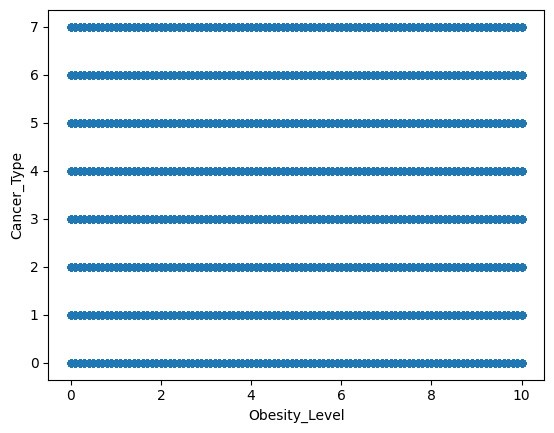

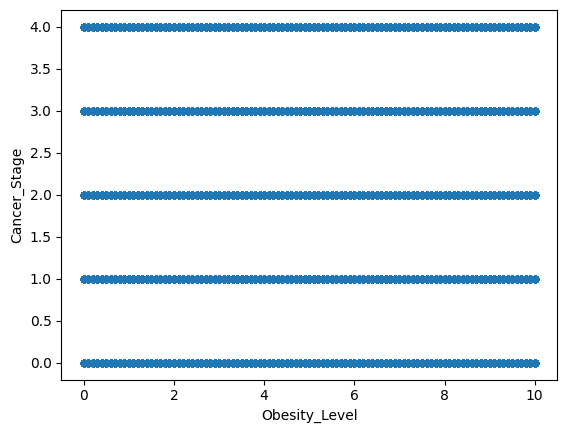

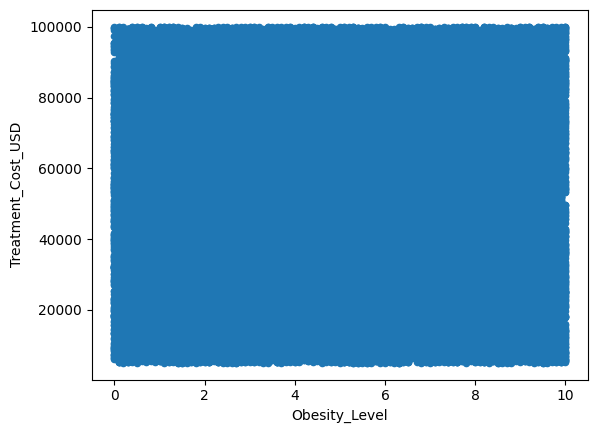

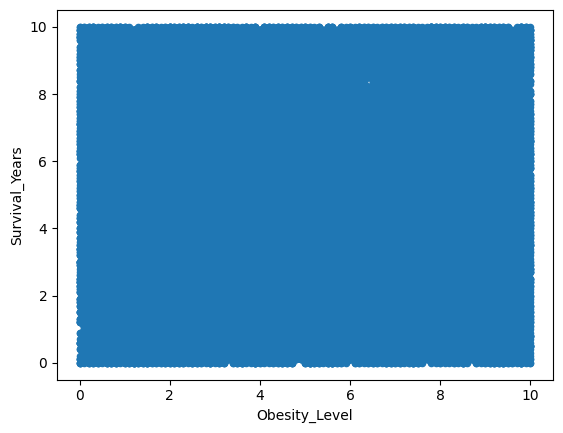

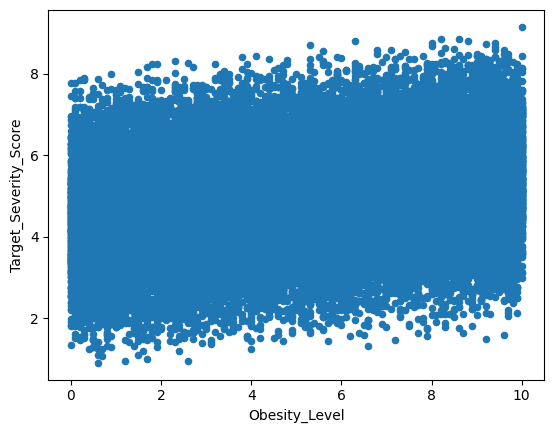

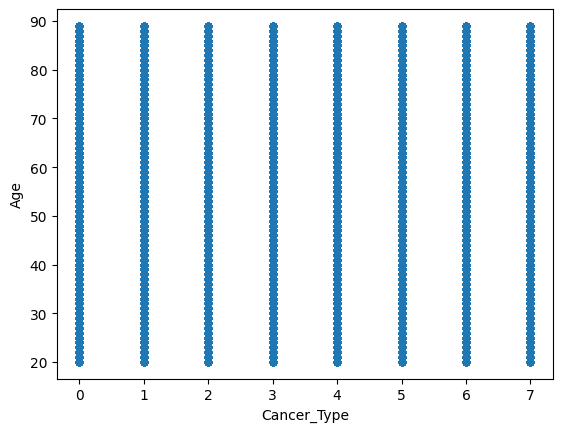

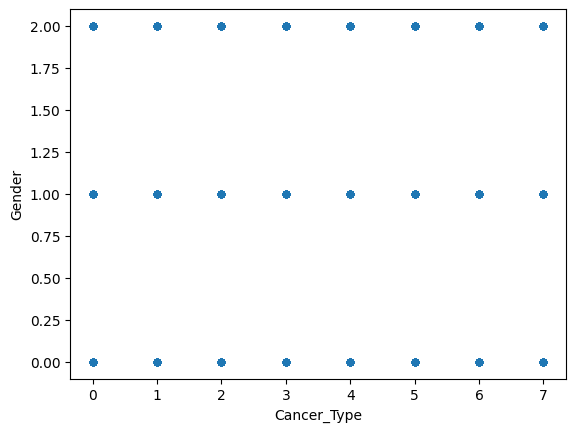

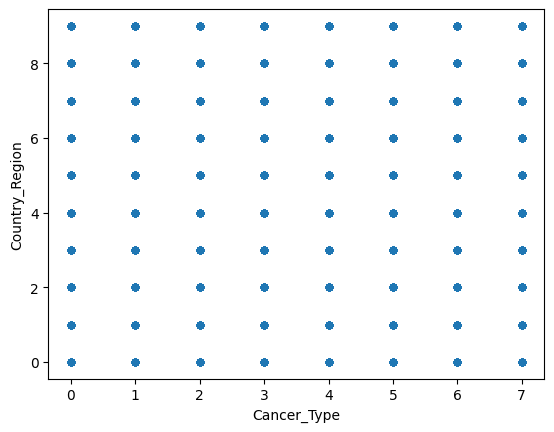

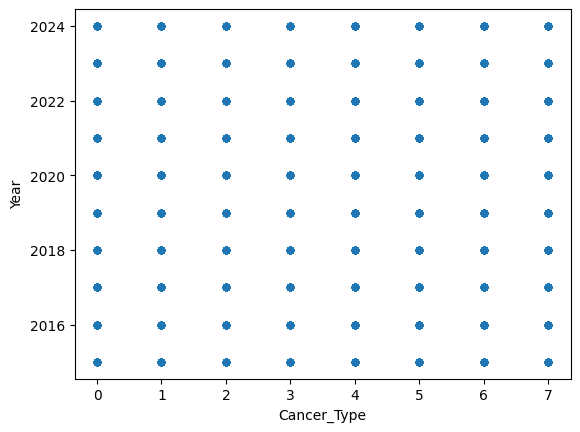

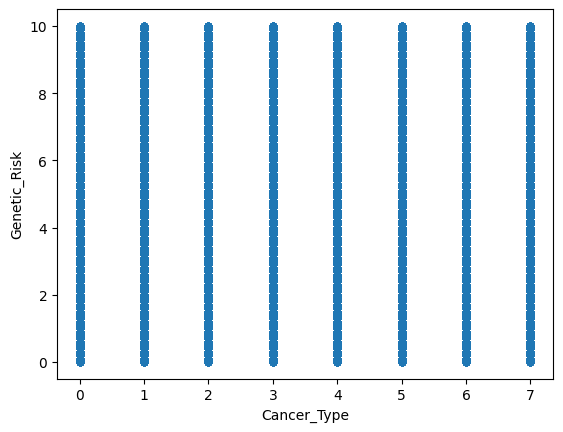

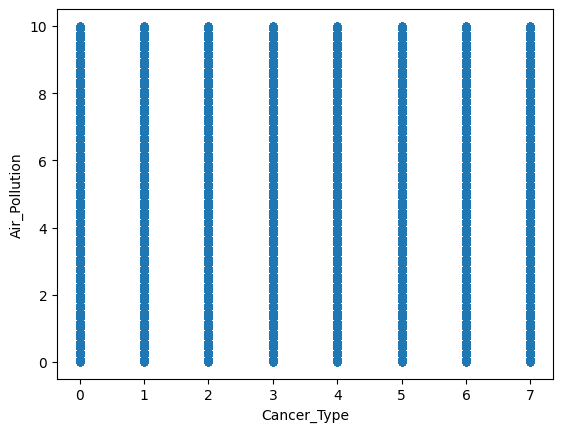

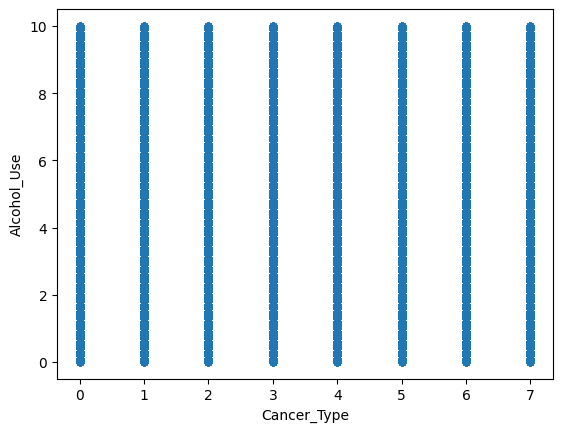

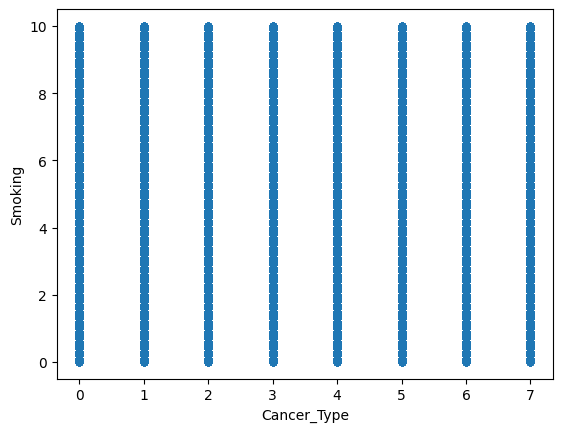

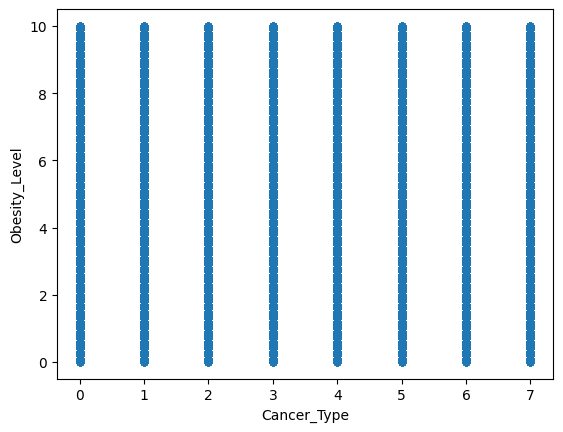

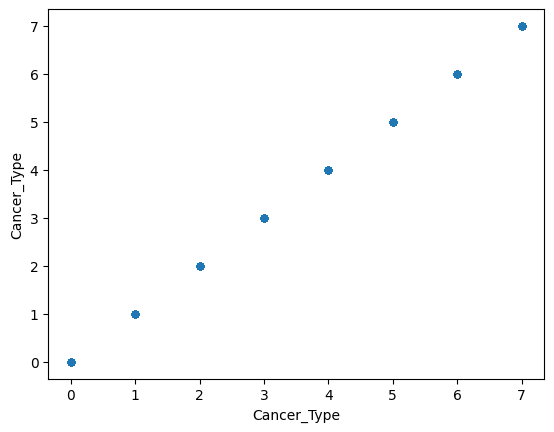

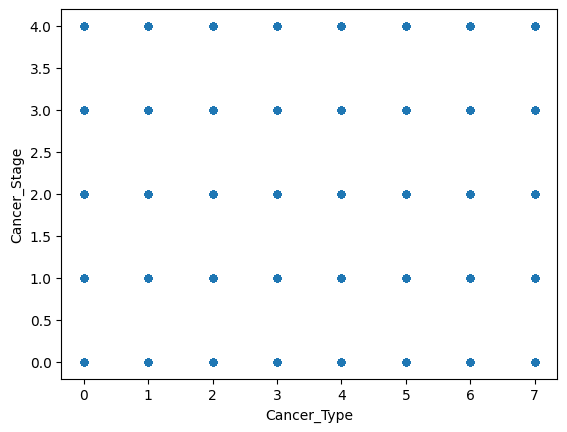

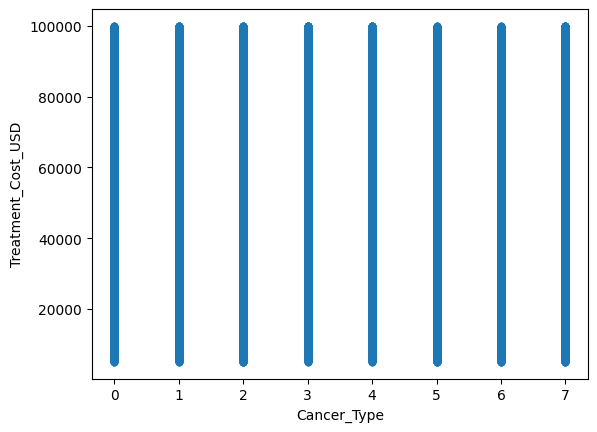

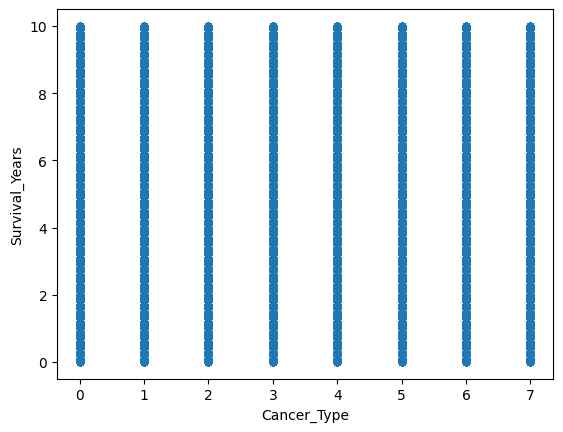

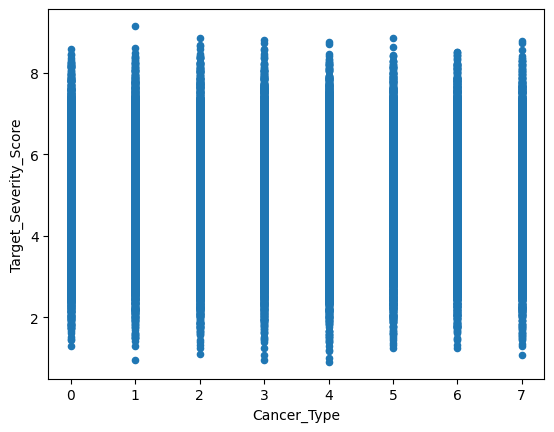

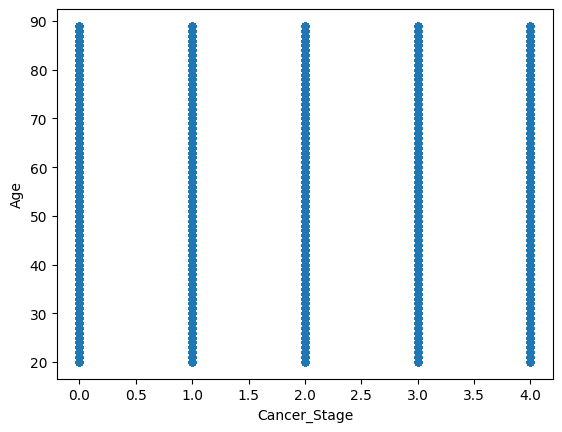

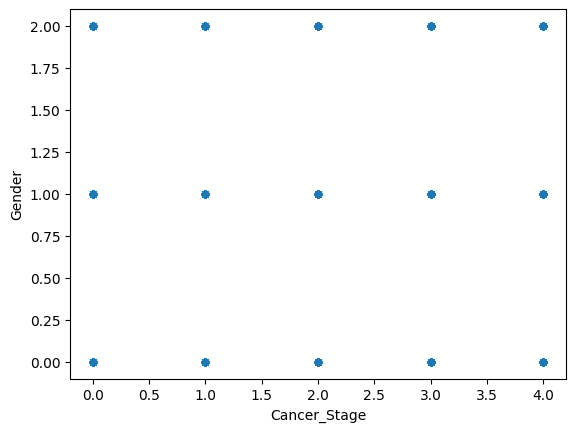

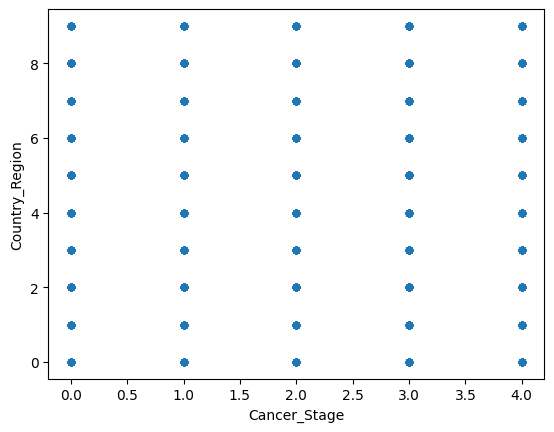

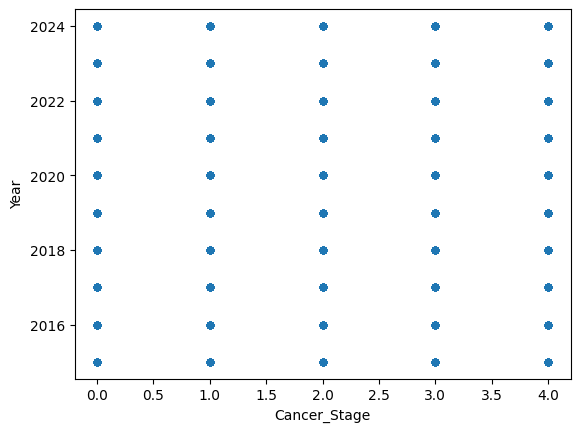

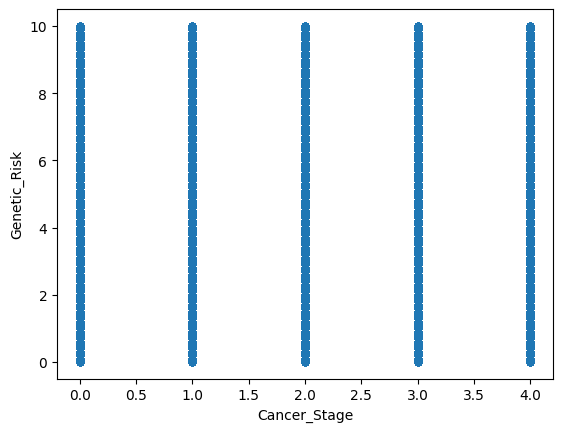

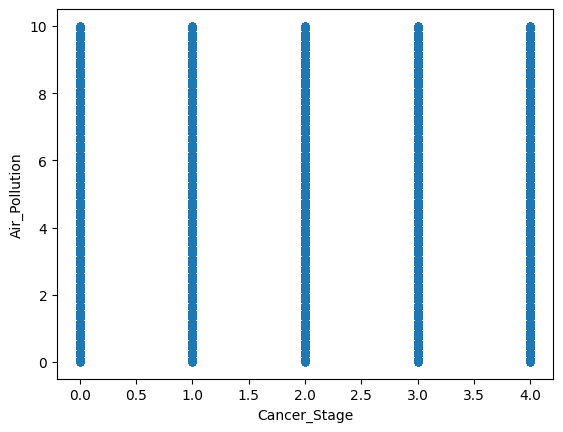

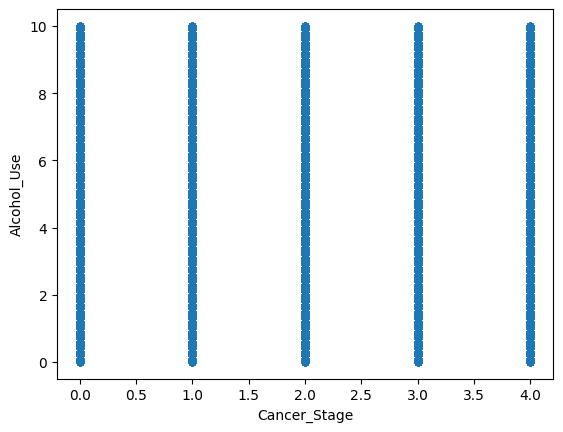

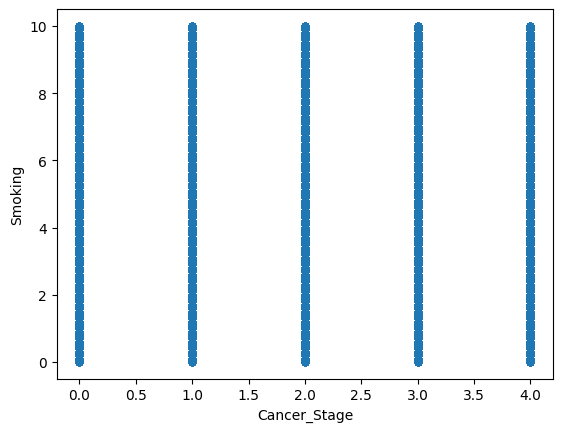

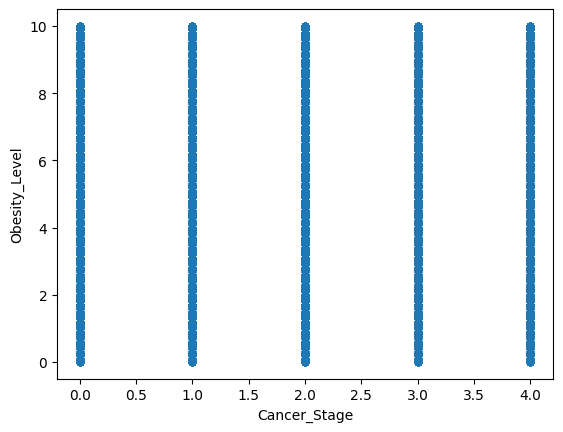

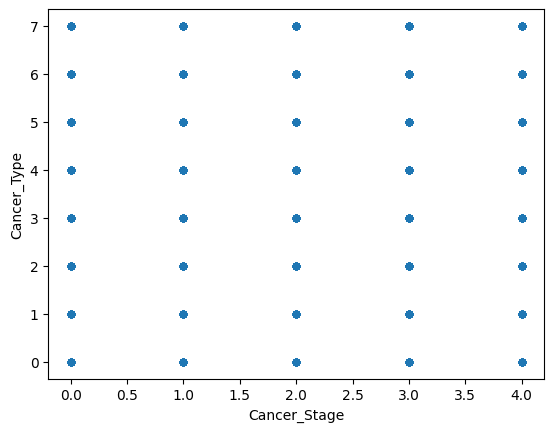

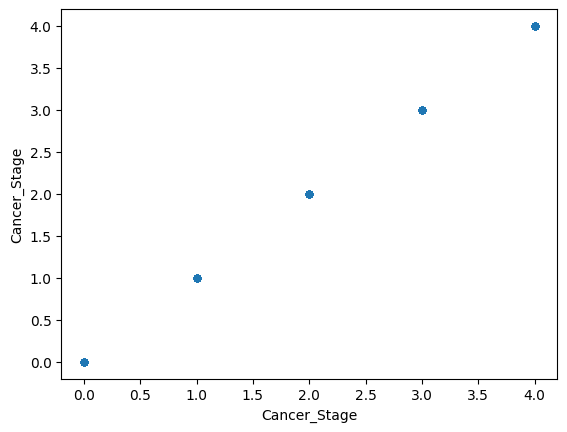

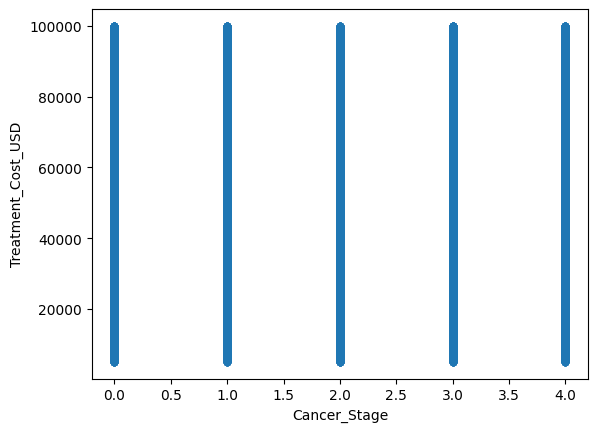

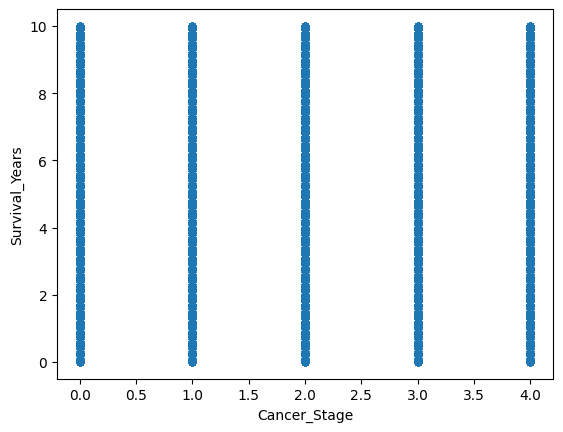

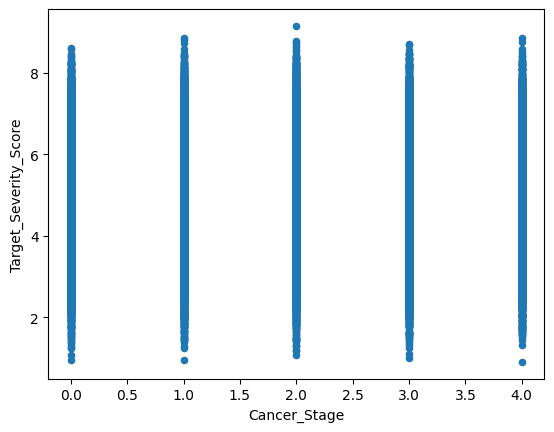

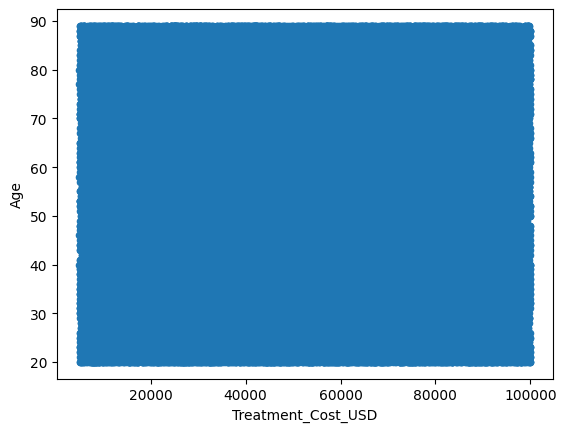

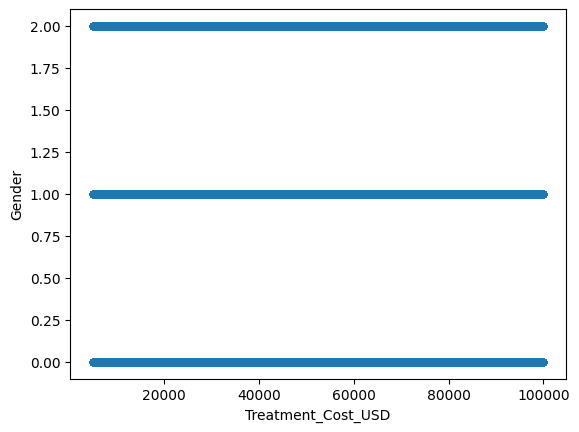

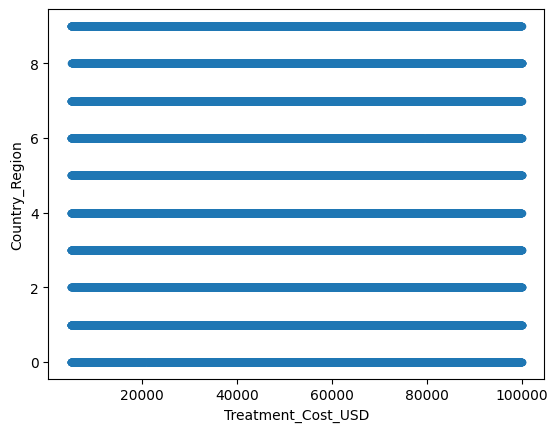

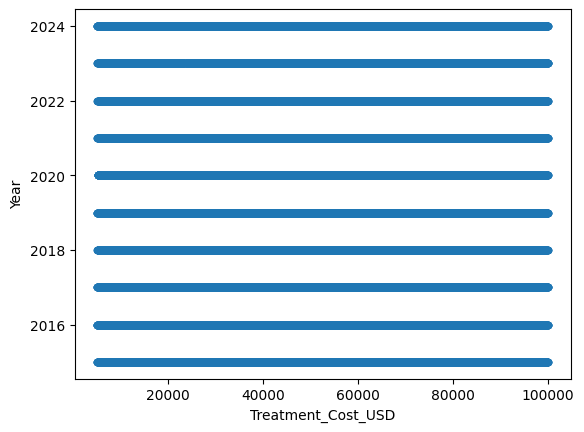

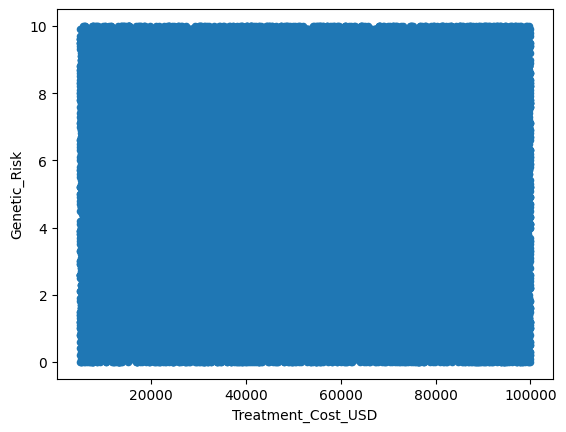

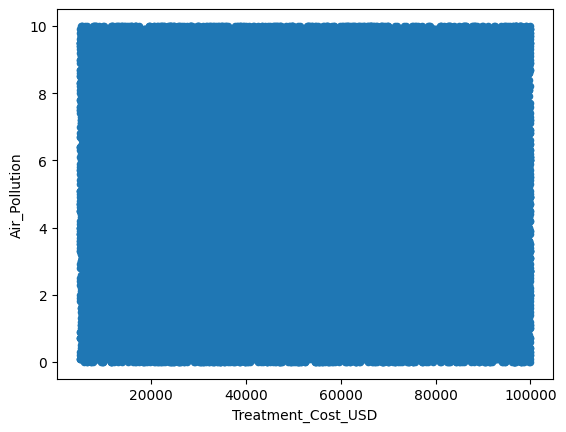

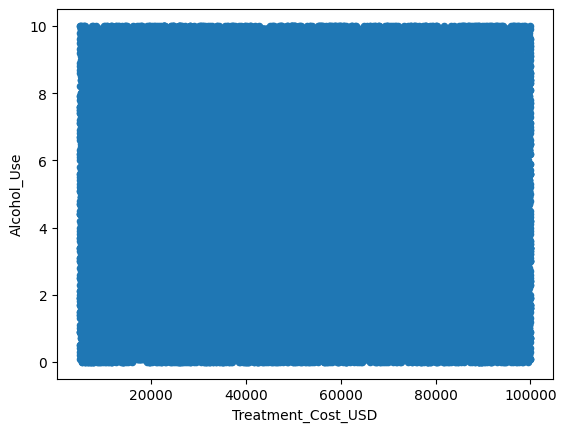

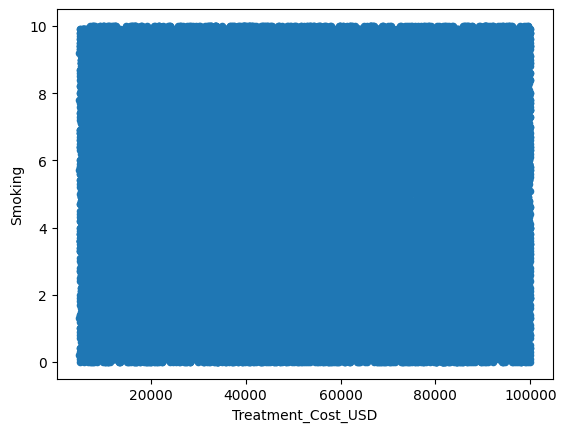

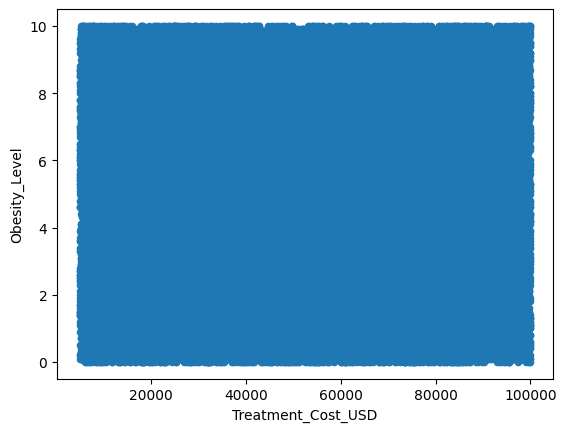

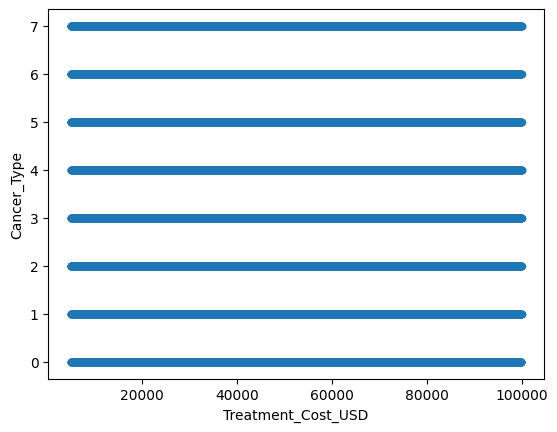

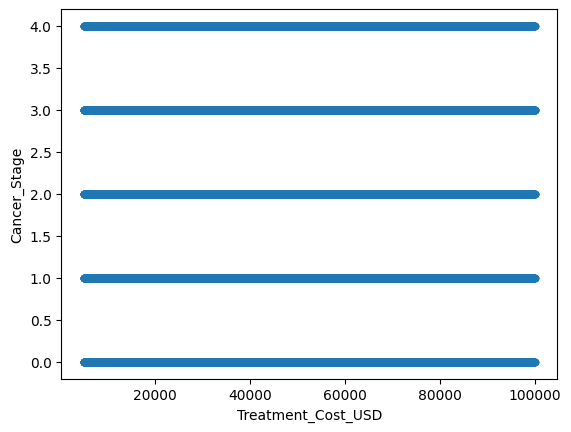

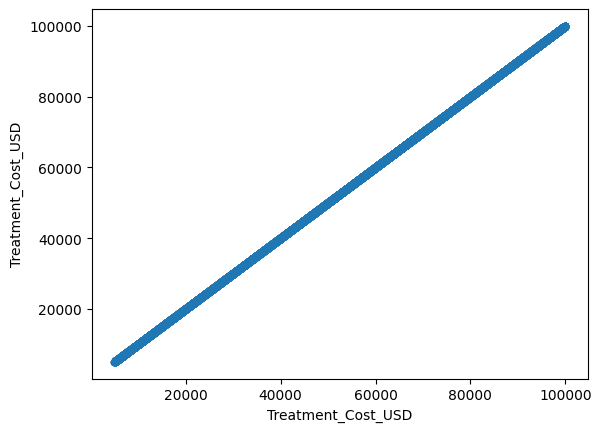

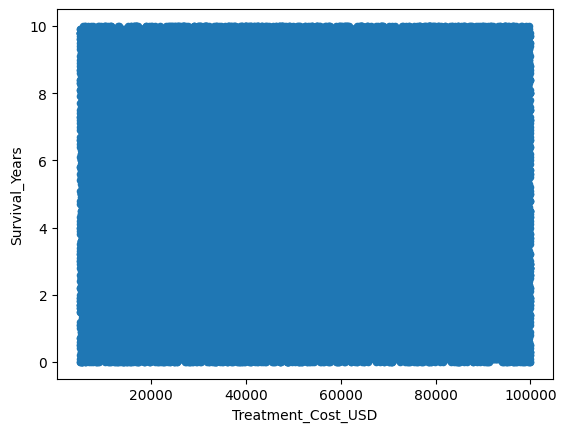

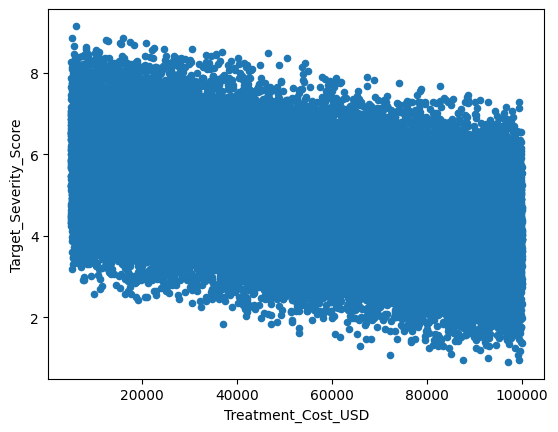

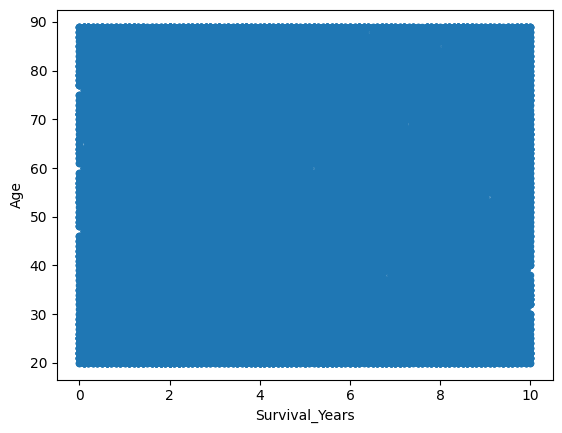

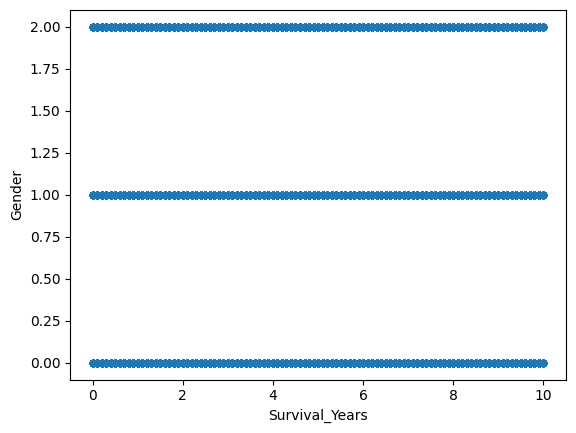

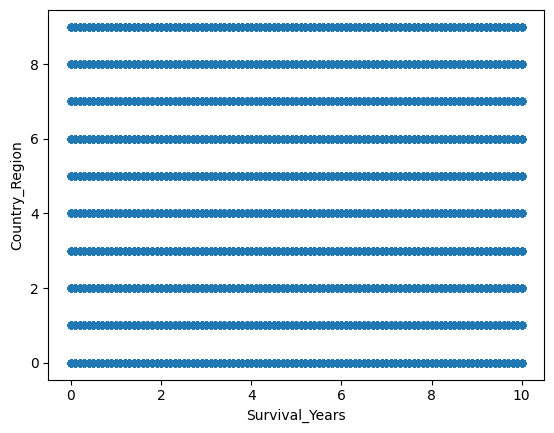

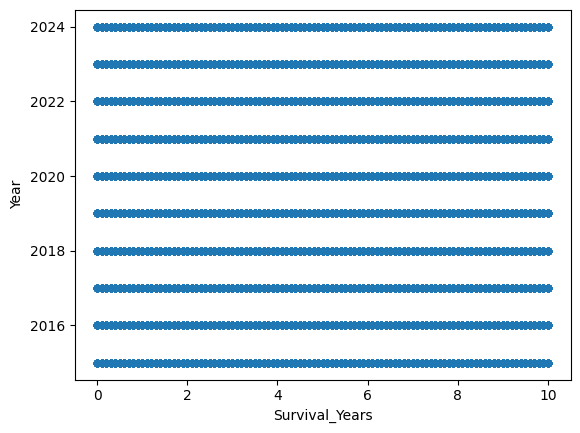

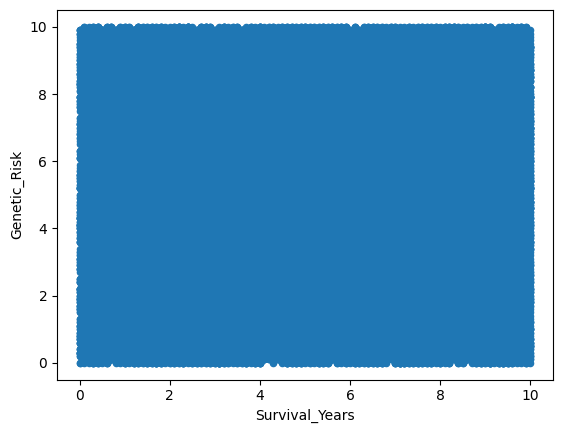

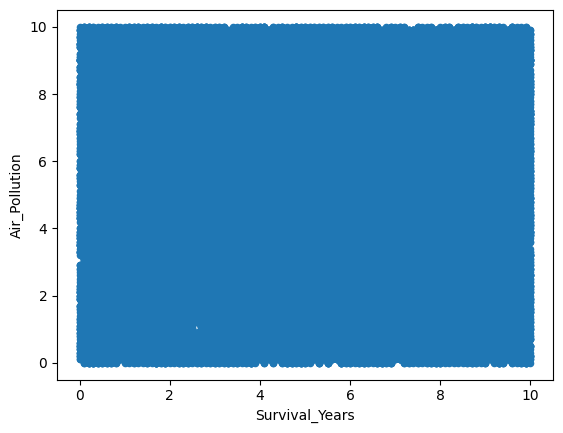

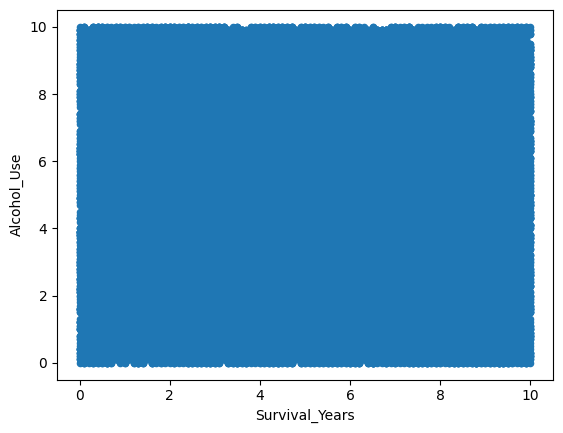

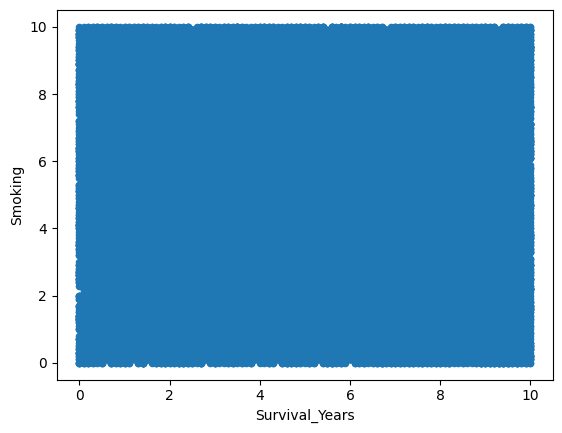

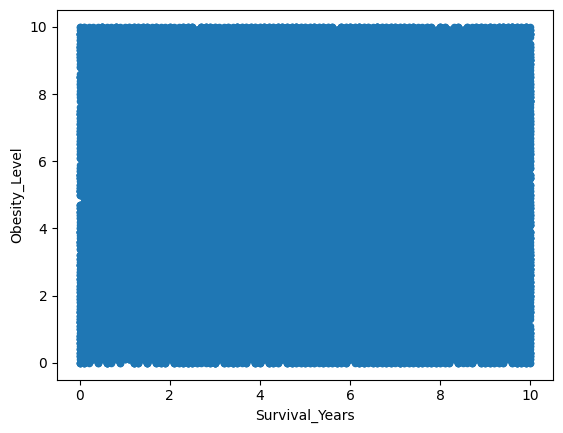

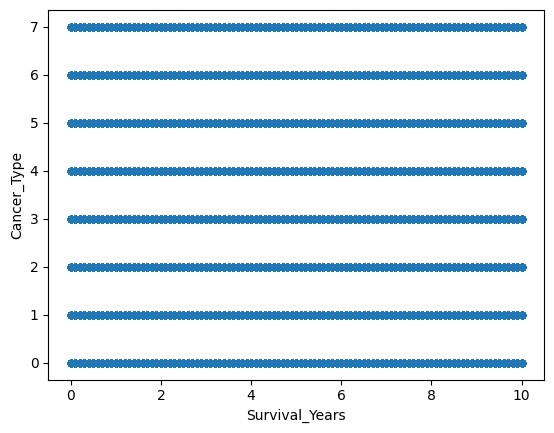

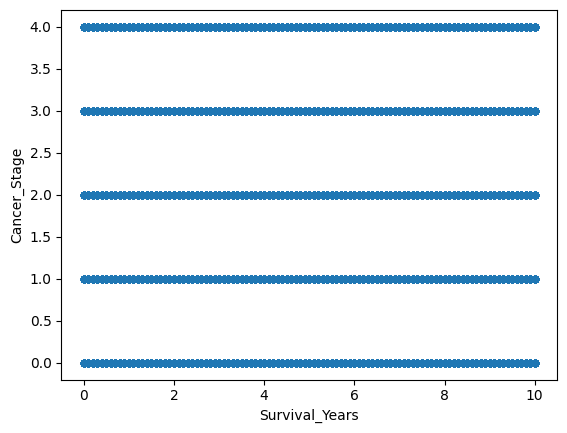

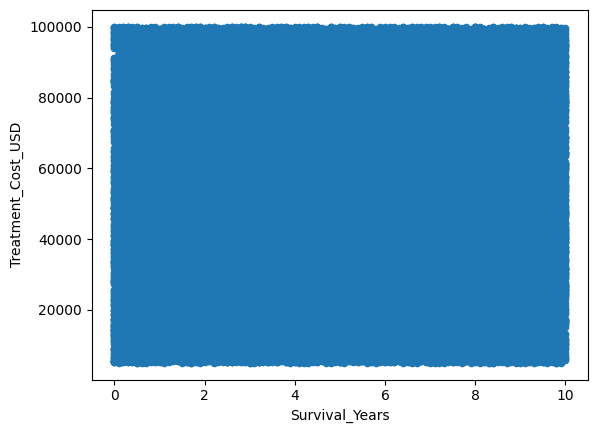

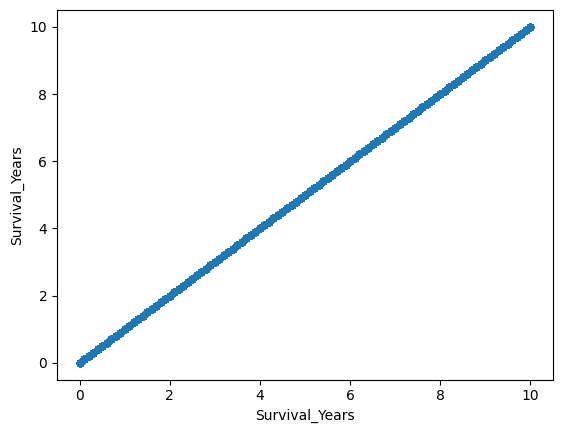

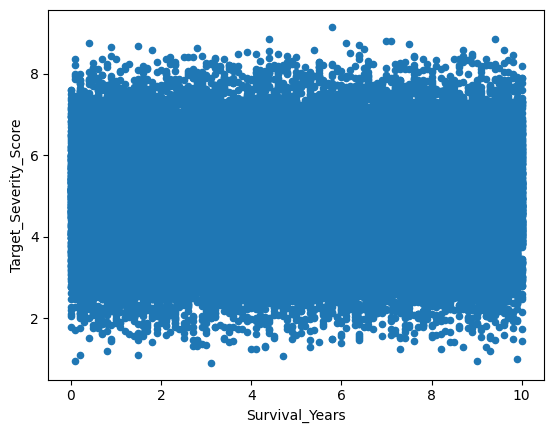

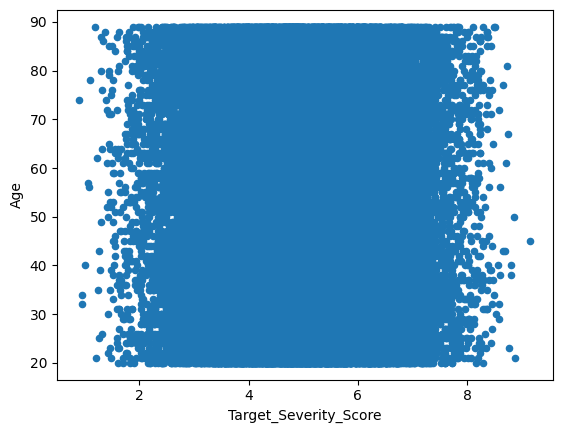

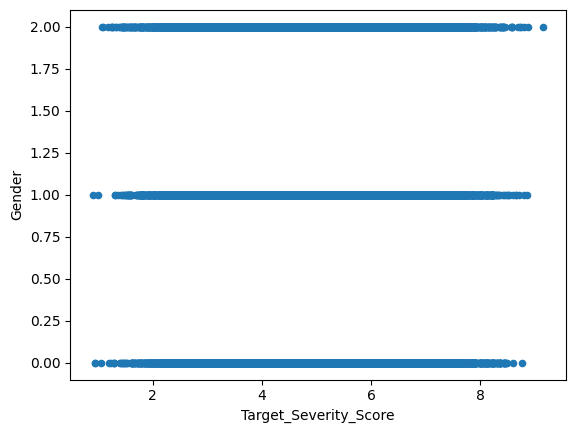

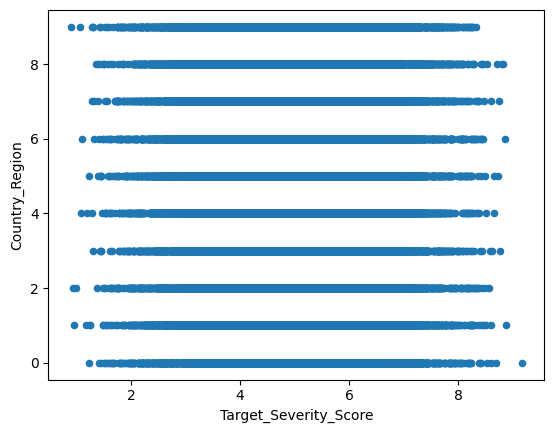

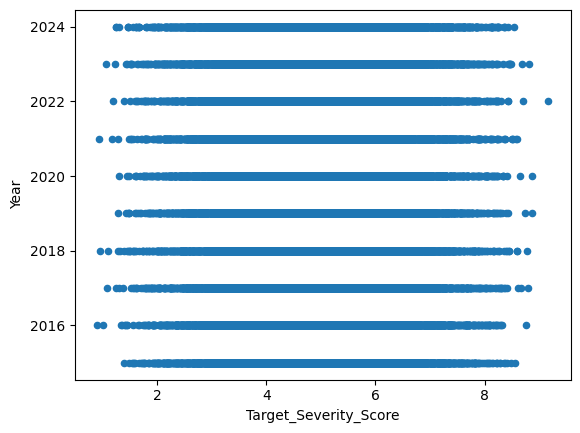

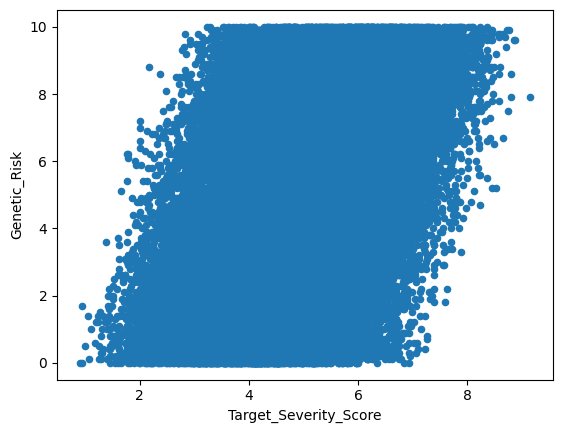

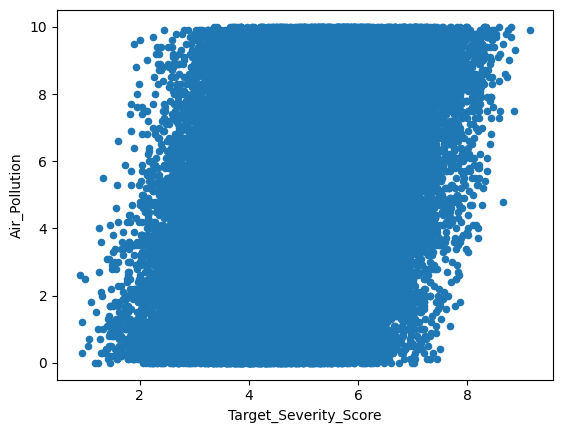

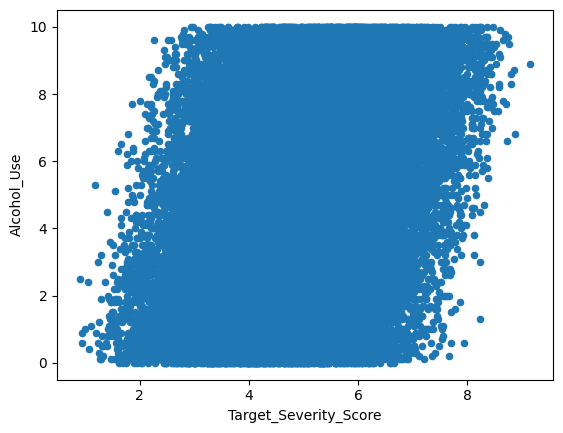

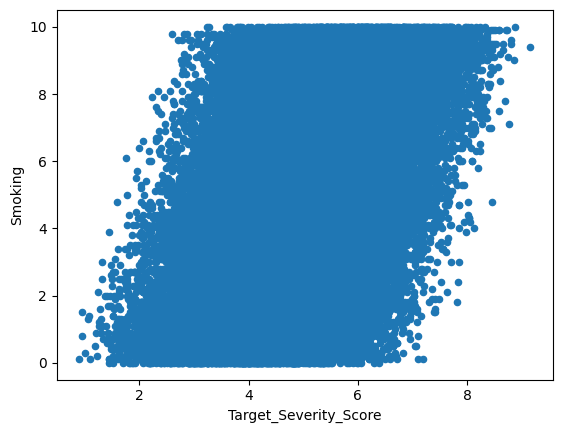

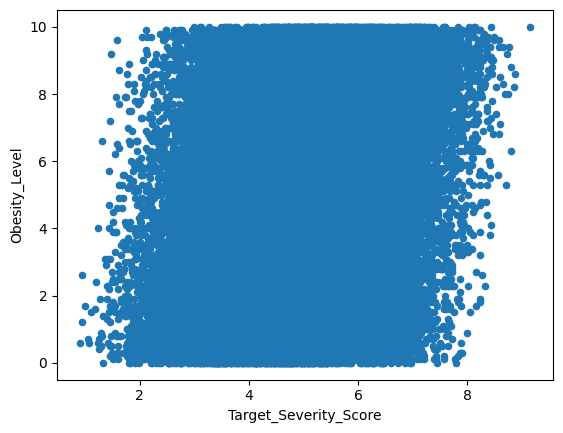

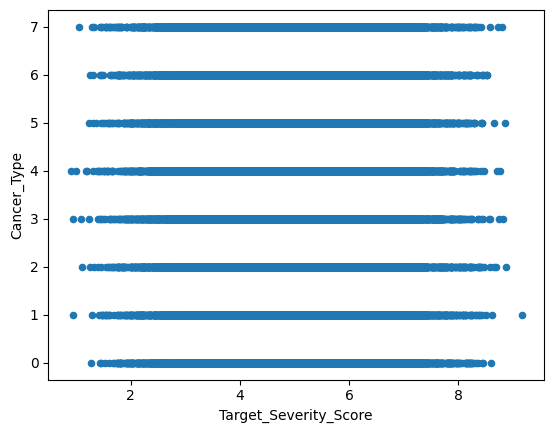

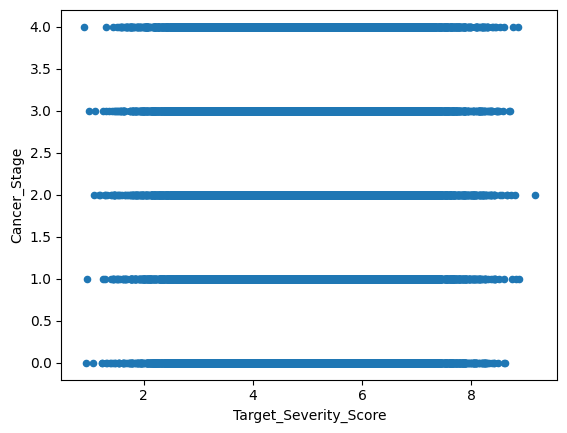

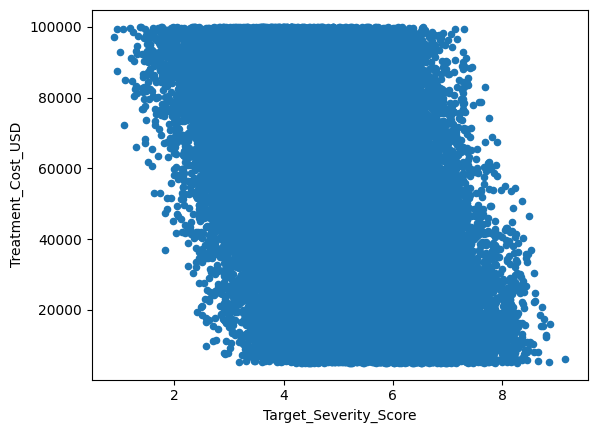

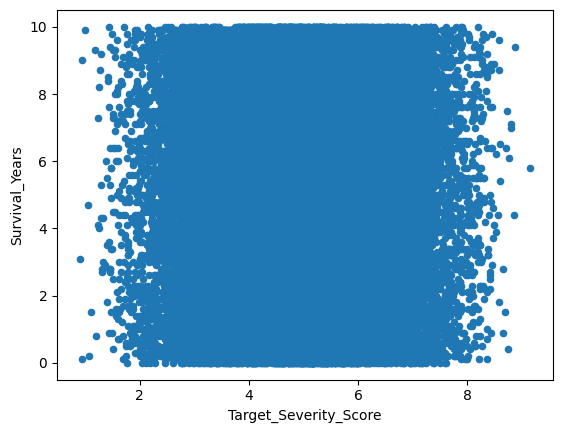

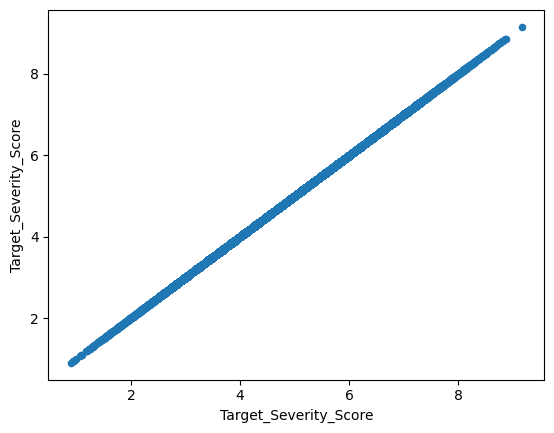

In [11]:
for i in iter(dataframe.columns):
        for j in iter(dataframe.columns):
                dataframe.plot(x=i,y=j,kind="scatter")
                plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
poly=PolynomialFeatures()
X=dataframe.drop(columns=["Cancer_Type"])
y=dataframe["Cancer_Type"]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)
print(x_train.shape,y_train.shape)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37500, 13) (37500,)
(37500, 105) (12500, 105) (37500,) (12500,)


In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
svm_model=SVC()
hgbc=HistGradientBoostingClassifier(max_iter=1000)
rfc=RandomForestClassifier(n_jobs=-1,max_depth=10)
svm_model.fit(x_train,y_train)
hgbc.fit(x_train,y_train)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1)

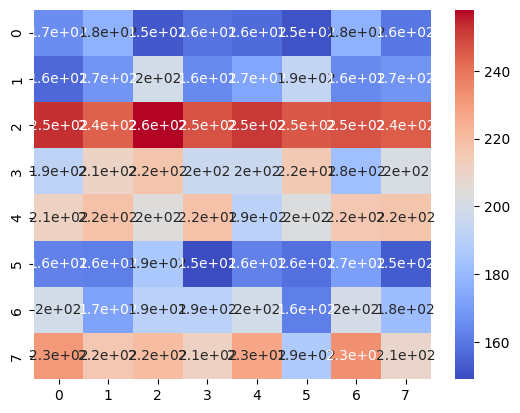

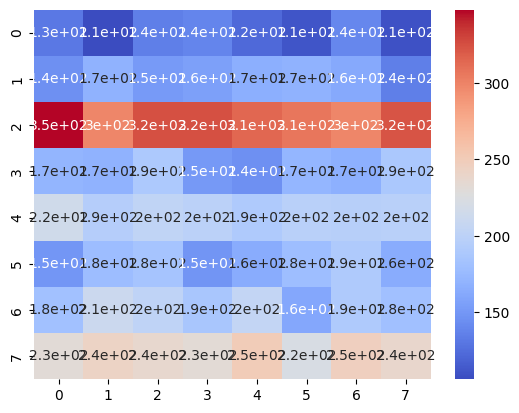

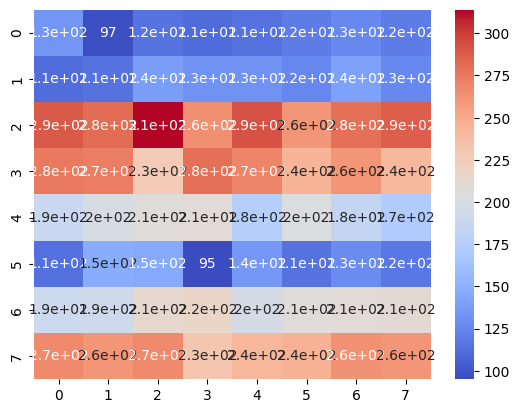

              precision    recall  f1-score   support

           0       0.11      0.13      0.12      1299
           1       0.11      0.12      0.11      1388
           2       0.16      0.13      0.14      1992
           3       0.13      0.12      0.12      1609
           4       0.12      0.11      0.12      1678
           5       0.10      0.12      0.11      1305
           6       0.13      0.13      0.13      1495
           7       0.14      0.12      0.13      1734

    accuracy                           0.12     12500
   macro avg       0.12      0.12      0.12     12500
weighted avg       0.13      0.12      0.12     12500

              precision    recall  f1-score   support

           0       0.08      0.13      0.10       994
           1       0.11      0.13      0.12      1254
           2       0.20      0.13      0.16      2538
           3       0.10      0.11      0.10      1352
           4       0.12      0.12      0.12      1592
           5       0.12 

In [14]:
y_preds1=svm_model.predict(x_test)
y_preds2=hgbc.predict(x_test)
y_preds3=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc1=accuracy_score(y_preds1,y_test)
acc2=accuracy_score(y_preds2,y_test)
acc3=accuracy_score(y_preds3,y_test)
matrix1=confusion_matrix(y_preds1,y_test)
matrix2=confusion_matrix(y_preds2,y_test)
matrix3=confusion_matrix(y_preds3,y_test)
report1=classification_report(y_preds1,y_test)
report2=classification_report(y_preds2,y_test)
report3=classification_report(y_preds3,y_test)


sns.heatmap(matrix1,annot=True,cmap="coolwarm")
plt.show()

sns.heatmap(matrix2,annot=True,cmap="coolwarm")
plt.show()
sns.heatmap(matrix3,annot=True,cmap="coolwarm")
plt.show()
print(report1)
print(report2)
print(report3)


In [15]:
dataframe_new=pd.DataFrame(
        [
                ["SVM",acc1*100],
                ["HistGradientBoostingClassifier",acc2*100],
                ["RandomForestClassifier",acc3*100]
        ],
        columns=["ML ALGORITHM","accuracy_score"]
)
print(dataframe_new)


                     ML ALGORITHM  accuracy_score
0                             SVM          12.368
1  HistGradientBoostingClassifier          12.592
2          RandomForestClassifier          12.800
